# Düsseldorf Sportos Draft (2017), FIFA League

## Data set: https://www.kaggle.com/artimous/complete-fifa-2017-player-dataset-global
## References: 
- https://en.wikipedia.org/wiki/2017_NHL_Expansion_Draft
- https://en.wikipedia.org/wiki/Draft_(sports)
- https://www.realmadrid.com/en/football/squad
- https://www.fifaah.com/news/1042--fifa-18-squad-ratings-formulacombinations-%E2%80%93-how-to-build-the-cheapest-8878-rated-team-for-sbc.html
- https://fifaforums.easports.com/en/discussion/277545/how-player-rating-is-calculated-it-is-a-total-mess
- https://7500toholte.sbnation.com/2016/1/31/10878956/football-tactics-basics-the-4-2-3-1-formation-explained
- http://sharemytactics.com/60487/
- https://www.dw.com/en/the-top-10-most-expensive-football-transfers/g-41958100
- https://fifaforums.easports.com/en/discussion/277545/how-player-rating-is-calculated-it-is-a-total-mess



# Problem

We have a dataset containing information of FIFA 2017 rankings of all the current soccer players aroung the world. A new team Düsseldorf Sportos is to be populated from these bunch of players. We are assuming here that all the players are available for this expansion draft and no player is off the table.

Dataset has been taken from this link: https://www.kaggle.com/artimous/complete-fifa-2017-player-dataset-global


We would focus majorly on the 'FullData.csv'.

# Importing Libraries

Before we dive into the analysis we will load all the necessary libraries to analyze the data set.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Loading dataset
We will load the dataset 

In [2]:
playerDF = pd.read_csv('FullData.csv')
print('There are',playerDF.shape[0], "players in the data set.")
playerDF.head()

There are 17588 players in the data set.


,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


# Data Validation

Checking for data type of all the columns and attributes in the data set.

In [3]:
playerDF.dtypes

Name                   object
Nationality            object
National_Position      object
National_Kit          float64
Club                   object
Club_Position          object
Club_Kit              float64
Club_Joining           object
Contract_Expiry       float64
Rating                  int64
Height                 object
Weight                 object
Preffered_Foot         object
Birth_Date             object
Age                     int64
Preffered_Position     object
Work_Rate              object
Weak_foot               int64
Skill_Moves             int64
Ball_Control            int64
Dribbling               int64
Marking                 int64
Sliding_Tackle          int64
Standing_Tackle         int64
Aggression              int64
Reactions               int64
Attacking_Position      int64
Interceptions           int64
Vision                  int64
Composure               int64
Crossing                int64
Short_Pass              int64
Long_Pass               int64
Accelerati

In [4]:
#these are all the attributed in the data set
playerDF.dtypes.index
#allAttributes

Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes'],
      dtype='object')

For our analysis we are assuming that all the players are available to be drafted in (and no player is off the table). So we are removing the following columns as they would not add value to the analysis: 'Club_Joining', 'Contract_Expiry'.
Also, attributes such as 'Nationality', 'National_Kit', 'Club', 'Club_Kit' does not add add any value to our analysis, we can remove these columns as well.

We have three attributes 'National_Position', 'Club_Position' and 'Preffered_Position', we wouldn't be needing all three and actually we could only use 'Preffered_Position' for our analysis, but for the time being lets just remove teh column 'National_Position'. We will use 'Club_Position' and 'Preffered_Position' in our analysis.

In [5]:
playerDF.drop(['Nationality', 'National_Position','National_Kit', 'Club','Club_Kit', 'Club_Joining','Contract_Expiry'], axis=1, inplace=True)

In [6]:
playerDF.head()

,Name,Club_Position,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,LW,94,185 cm,80 kg,Right,02/05/1985,32,LW/ST,High / Low,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,RW,93,170 cm,72 kg,Left,06/24/1987,29,RW,Medium / Medium,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,LW,92,174 cm,68 kg,Right,02/05/1992,25,LW,High / Medium,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,ST,92,182 cm,85 kg,Right,01/24/1987,30,ST,High / Medium,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,GK,92,193 cm,92 kg,Right,03/27/1986,31,GK,Medium / Medium,...,16,14,11,47,11,91,89,95,90,89


Checking for any null/missing values in the data set

In [7]:
playerDF.isnull().any()

Name                  False
Club_Position          True
Rating                False
Height                False
Weight                False
Preffered_Foot        False
Birth_Date            False
Age                   False
Preffered_Position    False
Work_Rate             False
Weak_foot             False
Skill_Moves           False
Ball_Control          False
Dribbling             False
Marking               False
Sliding_Tackle        False
Standing_Tackle       False
Aggression            False
Reactions             False
Attacking_Position    False
Interceptions         False
Vision                False
Composure             False
Crossing              False
Short_Pass            False
Long_Pass             False
Acceleration          False
Speed                 False
Stamina               False
Strength              False
Balance               False
Agility               False
Jumping               False
Heading               False
Shot_Power            False
Finishing           

We see that 'Club_Position' attribute contains null value, we need to andle this before our analysis. Let's see which all records have null values.

In [8]:
indexNan = playerDF[playerDF.isnull().any(axis=1)].index
indexNan

Int64Index([383], dtype='int64')

We can observe that record 383 contains null value and it needs to be imputed.

In [9]:
playerDF.loc[indexNan]

,Name,Club_Position,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
383,Didier Drogba,NaN,81,189 cm,80 kg,Right,03/11/1978,39,ST,Medium / Low,...,79,78,84,84,76,6,10,8,11,14


TO reason why this players has a null value is that this is an old player and no longer plays for any club now and hence no value for the field 'Club_Position'. We can remove this row as well, as probably we shouldn't be drafting in a player who's 39 years old, but for now I'm deciding Imputing this missing value of 'Club_Position' with the attribute 'Preffered_Position'.

In [10]:
playerDF.loc[indexNan,'Club_Position']=playerDF.loc[indexNan].Preffered_Position
playerDF.loc[indexNan]

,Name,Club_Position,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
383,Didier Drogba,ST,81,189 cm,80 kg,Right,03/11/1978,39,ST,Medium / Low,...,79,78,84,84,76,6,10,8,11,14


Checking for missing values again.

In [11]:
playerDF[playerDF.isnull().any(axis=1)]
#playerDF.isnull().any()

,Name,Club_Position,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes


Above we can see that after imputing the missing value in 'Club_Position' there are now rows present with any missing values in.

## Exploratiory Data Analysis

Let's start analyzing the data by visualizing it. We'll check for descriptive statistics for age as well as plot the density plot of player and age and see how it looks

In [12]:
playerDF['Age'].describe()

count    17588.000000
mean        25.460314
std          4.680217
min         17.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         47.000000
Name: Age, dtype: float64

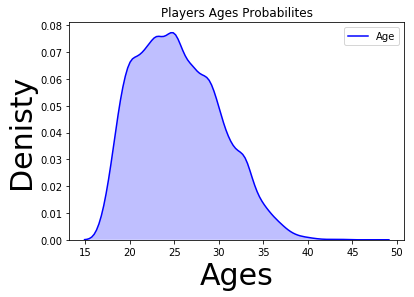

In [13]:
#Get age of all players
age_player = playerDF["Age"]

sns.kdeplot(age_player,shade=True, color="b")
plt.xlabel('Ages', fontsize=30)
plt.ylabel('Denisty', fontsize=30)
plt.title('Players Ages Probabilites')
plt.show()

In the plot above we can see the player-age density plot, we can observe that most players lie in the age of 22 to 30 which confirms with the descriptive statistics.

Let's analyze the attribute 'Rating'.

In [14]:
playerDF['Rating'].describe()

count    17588.000000
mean        66.166193
std          7.083012
min         45.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Rating, dtype: float64

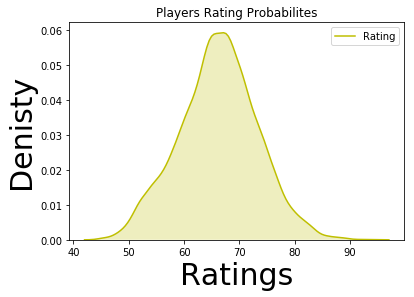

In [15]:
rating_player = playerDF["Rating"]

sns.kdeplot(rating_player,shade=True, color="y")
plt.xlabel('Ratings', fontsize=30)
plt.ylabel('Denisty', fontsize=30)
plt.title('Players Rating Probabilites')
plt.show()

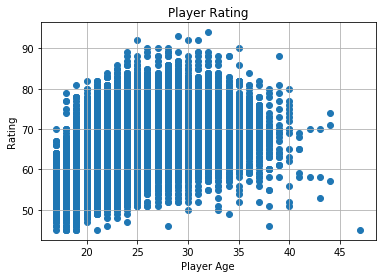

In [16]:
plt.scatter(playerDF['Age'], playerDF['Rating'])
plt.title('Player Rating')
plt.xlabel('Player Age')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

We can observe that players between the age of 24 to 32 have the highest rating (reserch suggest this range is a prime age for any footballer) after this age their performance and ratings starts dipping (some exceptions can always be there where players are in  great shape till the age of 38 but these are rare cases).


During the draft we should aim to pick players who are under the age of 30 (accounting for future and long run performance as well).

Let's validate the data and see if all the columns have the correct data type and correct range of values. Looking for the datatype of all columns to spot any irregularity.

In [17]:
playerDF.dtypes

Name                  object
Club_Position         object
Rating                 int64
Height                object
Weight                object
Preffered_Foot        object
Birth_Date            object
Age                    int64
Preffered_Position    object
Work_Rate             object
Weak_foot              int64
Skill_Moves            int64
Ball_Control           int64
Dribbling              int64
Marking                int64
Sliding_Tackle         int64
Standing_Tackle        int64
Aggression             int64
Reactions              int64
Attacking_Position     int64
Interceptions          int64
Vision                 int64
Composure              int64
Crossing               int64
Short_Pass             int64
Long_Pass              int64
Acceleration           int64
Speed                  int64
Stamina                int64
Strength               int64
Balance                int64
Agility                int64
Jumping                int64
Heading                int64
Shot_Power    

Looking at the data type the data looks clean. We'll plot all the numeric columns to see the range of values if there are any irregularities.

In [18]:
numericColumnNames=playerDF.select_dtypes(include=[np.number]).columns.tolist()

C:\Users\aayush\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


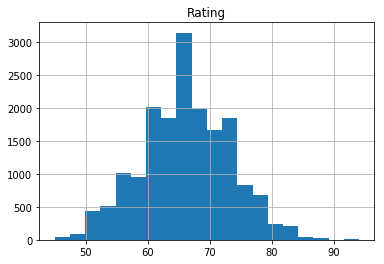

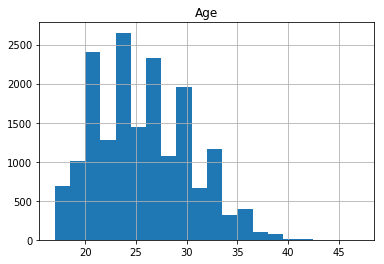

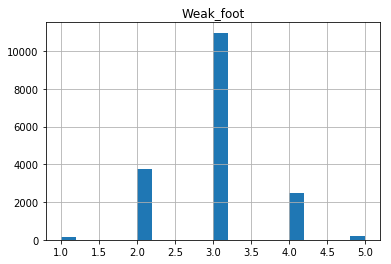

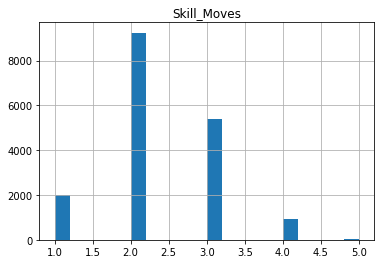

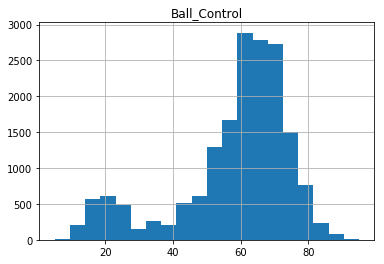

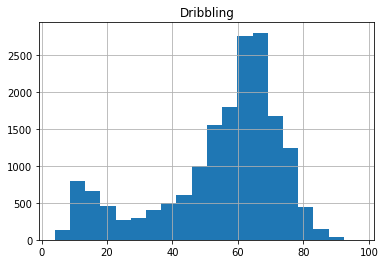

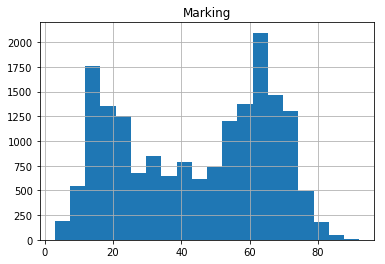

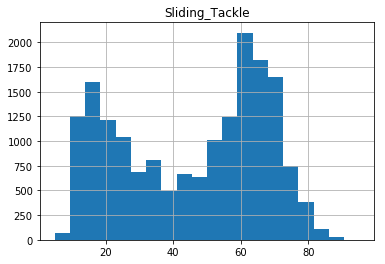

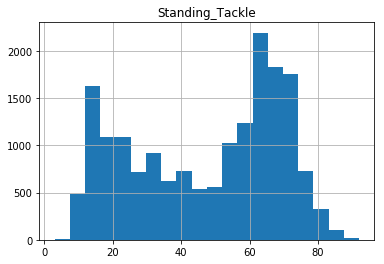

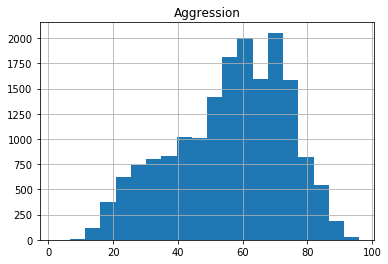

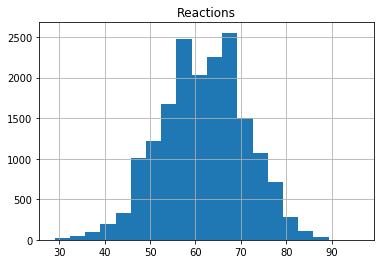

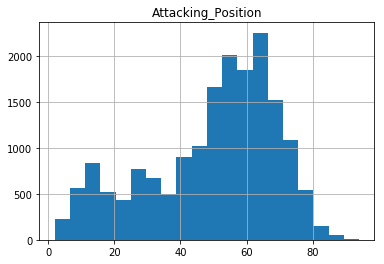

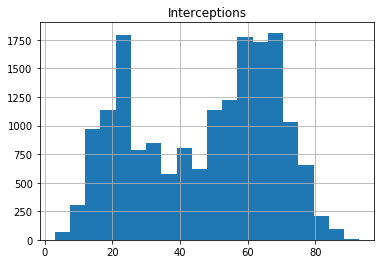

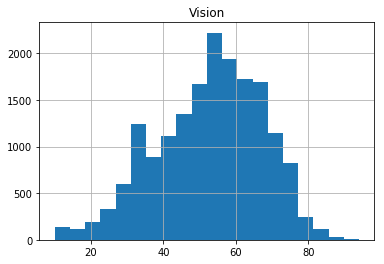

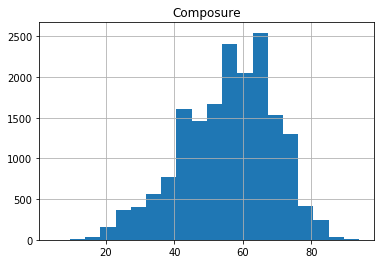

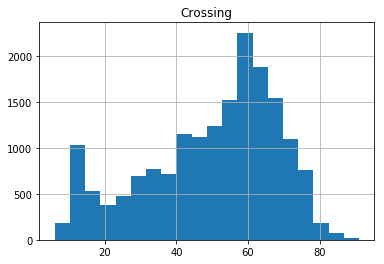

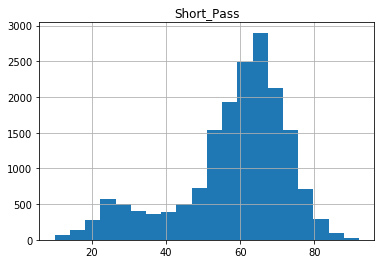

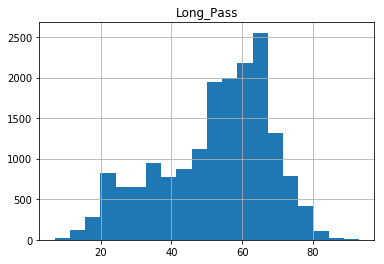

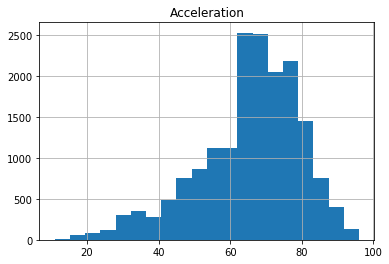

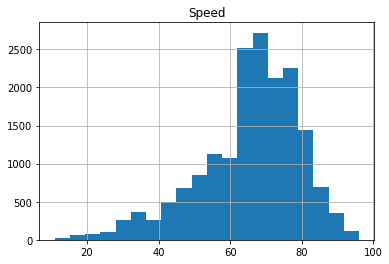

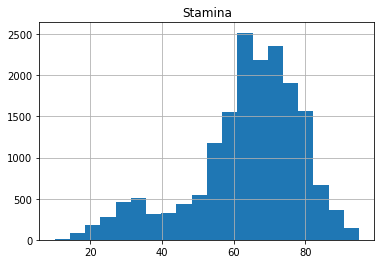

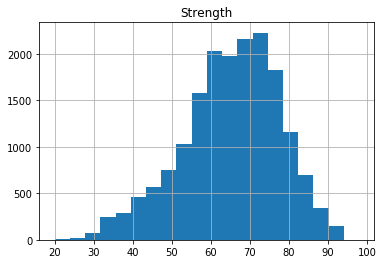

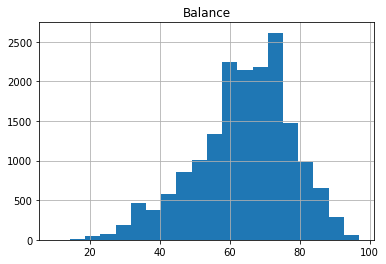

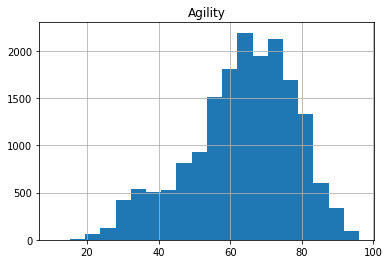

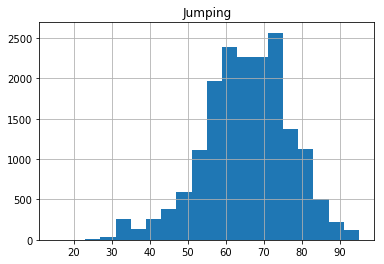

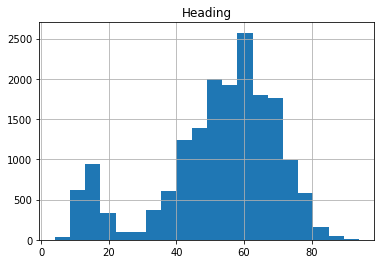

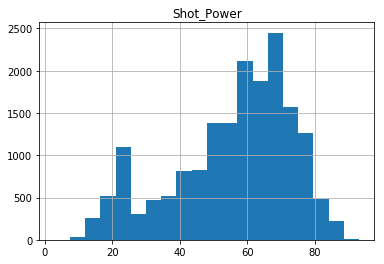

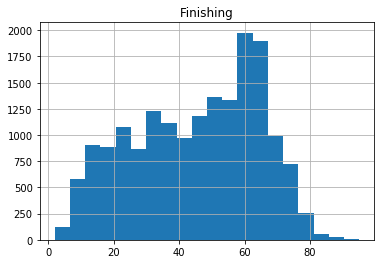

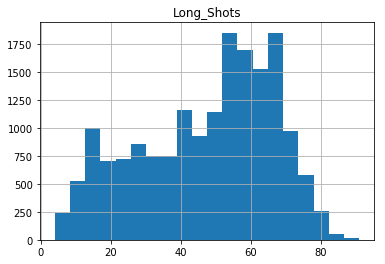

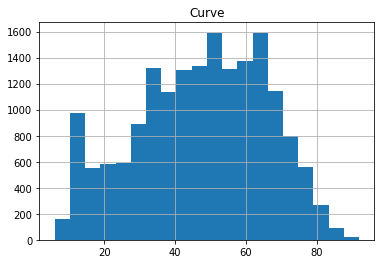

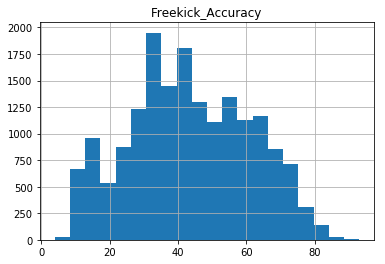

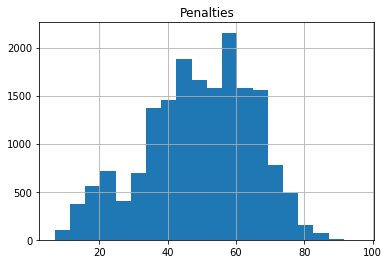

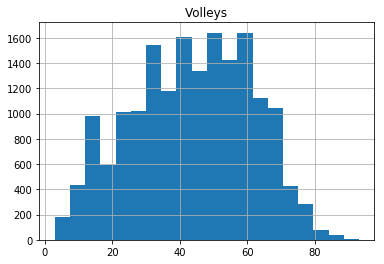

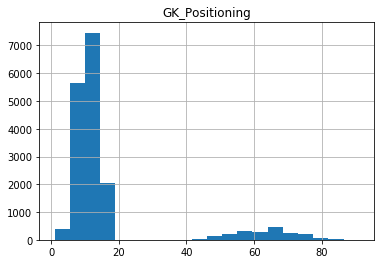

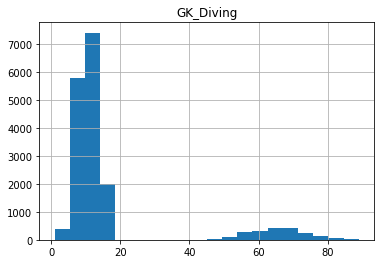

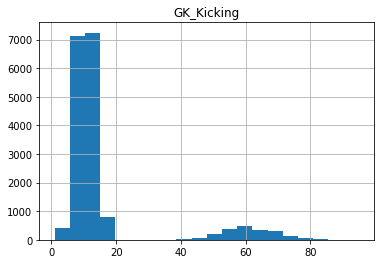

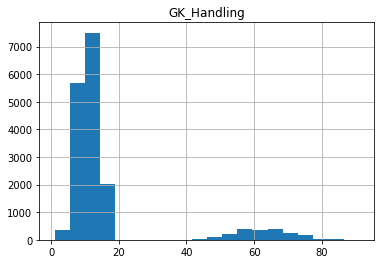

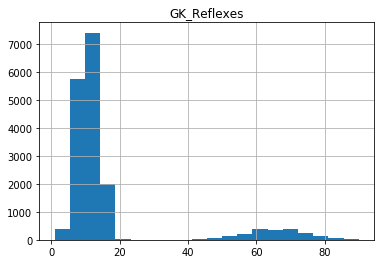

In [19]:
for x in numericColumnNames:
    playerDF.hist(column=x, bins=20)
    
plt.show()

Plots above show that fields have values in the correct range and we don't need to clean or transform these numeric columns.

Now we will validate for non numeric values, but first we need to seperate the non numeric column names from the data set.


seperating the non numeric columns

In [20]:
NonNumericColumns =[]
for x in playerDF.dtypes.index:
    if x not in numericColumnNames:
        NonNumericColumns.append(x)
NonNumericColumns        

['Name',
 'Club_Position',
 'Height',
 'Weight',
 'Preffered_Foot',
 'Birth_Date',
 'Preffered_Position',
 'Work_Rate']

checking for unique values in all these columns to check for any irregularity. 

In [21]:
for x in NonNumericColumns:
    #if x not in ['Name','Nationality','Club']:
    print('attribute:',x)
    print('Number of unique values for this field:',playerDF[x].nunique())
    print(playerDF[x].unique())

attribute: Name
Number of unique values for this field: 17341
['Cristiano Ronaldo' 'Lionel Messi' 'Neymar' ..., 'Tommy Ouldridge'
 'Mark Foden' 'Barry Richardson']
attribute: Club_Position
Number of unique values for this field: 29
['LW' 'RW' 'ST' 'GK' 'Sub' 'RCM' 'CAM' 'LCB' 'LCM' 'RS' 'RB' 'RCB' 'LM'
 'LDM' 'RM' 'LB' 'CDM' 'RDM' 'LF' 'CB' 'LAM' 'Res' 'CM' 'LS' 'RF' 'RWB'
 'RAM' 'LWB' 'CF']
attribute: Height
Number of unique values for this field: 50
['185 cm' '170 cm' '174 cm' '182 cm' '193 cm' '183 cm' '195 cm' '199 cm'
 '192 cm' '173 cm' '180 cm' '184 cm' '191 cm' '176 cm' '181 cm' '169 cm'
 '188 cm' '187 cm' '196 cm' '171 cm' '189 cm' '190 cm' '177 cm' '165 cm'
 '186 cm' '175 cm' '168 cm' '179 cm' '163 cm' '178 cm' '194 cm' '172 cm'
 '167 cm' '164 cm' '200 cm' '198 cm' '166 cm' '197 cm' '201 cm' '161 cm'
 '203 cm' '158 cm' '157 cm' '162 cm' '159 cm' '160 cm' '207 cm' '202 cm'
 '204 cm' '155 cm']
attribute: Weight
Number of unique values for this field: 56
['80 kg' '72 kg' '68 kg' 

We can see that almost all the columns have values in correct format. We can observe some issues with 'Club_Position' and 'Preffered_Position'. Looking at it closely.

In [22]:
print('The dataset has',playerDF['Club_Position'].nunique(), 'unique values for the attribute Club_Position.')
print('Printing all the unique values below to get a clear picture of the kind of values for this attribute.')
playerDF['Club_Position'].unique()

The dataset has 29 unique values for the attribute Club_Position.
Printing all the unique values below to get a clear picture of the kind of values for this attribute.


array(['LW', 'RW', 'ST', 'GK', 'Sub', 'RCM', 'CAM', 'LCB', 'LCM', 'RS',
       'RB', 'RCB', 'LM', 'LDM', 'RM', 'LB', 'CDM', 'RDM', 'LF', 'CB',
       'LAM', 'Res', 'CM', 'LS', 'RF', 'RWB', 'RAM', 'LWB', 'CF'], dtype=object)

We can observe that there are many rows where the value of 'Club_Position' is Sub (substitute) or Res (Reserve). We need proper values for this attribute for our analysis, Hence we would no longer be using this for our analysis but we will use the attribute 'Preffered_Position' for our analysis.

In [23]:
print('The dataset has',playerDF['Preffered_Position'].nunique(), 'unique values for the attribute Preffered_Position.')
print('Printing all the unique values below to get a clear picture of the kind of values for this attribute.')
playerDF['Preffered_Position'].unique()

The dataset has 292 unique values for the attribute Preffered_Position.
Printing all the unique values below to get a clear picture of the kind of values for this attribute.


array(['LW/ST', 'RW', 'LW', 'ST', 'GK', 'CB', 'LW/LM', 'CM/CDM', 'CAM/LW',
       'CM/CAM', 'ST/LW', 'CAM/RM/LM', 'LM/CAM', 'ST/RM', 'RB/CM', 'CM',
       'CAM/RM', 'CAM/LM', 'RM/RW', 'ST/CAM', 'LB/CM', 'RM/CAM',
       'CF/CAM/ST', 'CDM/CM', 'CM/CDM/LM', 'LB', 'LW/CAM', 'RW/CAM',
       'LM/LW', 'CAM/CDM', 'CAM/CM', 'CB/CDM', 'RB', 'CM/RM', 'LB/LM',
       'LM', 'CB/RB', 'CAM', 'CM/LW', 'CDM', 'RM', 'CB/LB', 'LM/RM',
       'ST/RW', 'CM/RW', 'RW/LW', 'CM/LM', 'CF/ST', 'ST/LM', 'RB/CB',
       'LM/CM/CAM', 'CAM/CF', 'CAM/ST', 'LW/CAM/LM', 'RB/RM', 'RM/LM',
       'CAM/LM/LW', 'LM/ST', 'RW/RM', 'CAM/ST/CF', 'CDM/CB', 'LB/CB',
       'RB/RWB', 'RW/ST', 'LW/CF', 'CDM/RM', 'RM/ST', 'LB/CDM', 'LM/RW',
       'RM/LW', 'RW/CM/LW', 'RB/RW', 'LB/RB', 'LB/LWB', 'CAM/RW', 'LW/RW',
       'CM/RB/CDM', 'CDM/RB', 'CM/CAM/LM', 'CF/RM', 'RB/LB', 'CF/CAM',
       'LM/CM', 'CF/LW', 'RM/CAM/ST', 'ST/RM/RW', 'CAM/CM/LM', 'RB/RW/RWB',
       'RM/RB', 'CM/CB', 'CAM/LM/CM', 'LWB/LB', 'CM/RB/RM', 'LM/RB',
   

We can see that many players have multiple values for the field 'Preffered_Position'. For our approach we will create a new column 'First_Preffered_Position' in our dataset by assigning one 'Preffered_Position' to each player who has multiple 'Preffered_Position'. We will do this by selecting the first value from the 'Preffered_Position'.

Reason for taking just the first position is that these are the most often preferred position for any player, based on researching about several players and their preferred position.

In [24]:
playerDF['First_Preffered_Position'] = playerDF['Preffered_Position'].str.split('/').str.get(0)
playerDF[['Name','Preffered_Position','First_Preffered_Position']].head(15)

,Name,Preffered_Position,First_Preffered_Position
0,Cristiano Ronaldo,LW/ST,LW
1,Lionel Messi,RW,RW
2,Neymar,LW,LW
3,Luis Suárez,ST,ST
4,Manuel Neuer,GK,GK
5,De Gea,GK,GK
6,Robert Lewandowski,ST,ST
7,Gareth Bale,RW,RW
8,Zlatan Ibrahimović,ST,ST
9,Thibaut Courtois,GK,GK


In [25]:
print('The dataset has',playerDF['First_Preffered_Position'].nunique(), 'unique values for the attribute First_Preffered_Position.')
print('Printing all the unique values below to get a clear picture of the kind of values for this attribute.')
playerDF['First_Preffered_Position'].unique()


The dataset has 15 unique values for the attribute First_Preffered_Position.
Printing all the unique values below to get a clear picture of the kind of values for this attribute.


array(['LW', 'RW', 'ST', 'GK', 'CB', 'CM', 'CAM', 'LM', 'RB', 'RM', 'LB',
       'CF', 'CDM', 'LWB', 'RWB'], dtype=object)

## Different Player Positions

Before moving ahead, lets discuss about these player positions as, there are many important player positions on a football pitch. Following are some of the important player positions 
- Goal Keeper
- Defensive Wing Backs/Defenders (LB/RB: Left, Right)
- Center Backs (Defenders)
- Center Midfielder/Defensive Midfielder (CM/CDM)
- Attacking Wingers/Attacking Midfielder (LW/RW/ML/RM: Left, Right)
- Center Attaking Midfielder (CAM)
- Striker (Forward)


Players who specialize in each of these area have special set of characteristics, attributes, and skills. 

Now we will discuss more about number of players to make a football team, playing team and players requitred to last a whole season.

During any game, a Football (European) team consist of 16 players (11 players and 5 substitutes). But, generally a team roster consists of 23 to 30 players to sustain for the whole season (year). Having several players for a position provides options to the coach, allows a coach to rest key players before important matches, helps in countering for injuries, bad form of any player (position). Also, having competition among players (for more playing time) brings the best out of a player. 

There are different formation (Strategy) a team may play in, depending on coaching strategy or player suspension, or to counter opponenets strategy. Generally a playing 11 consists of:
- [1 Goal Keeper] 1 GK
- [4 Defenders] 1 Left Back (Defender), 2 Center Back (Defender), 1 Right Back (Defender)
- [2 Midfielder] 2 Central Midfielder
- [3 Attacking Midfielder] 1 Left Winger (Attacking Mid), 1 Center Attacking Midfielder, 1 right Winger
- [1 Forward/Striker] 1 Striker 

<img src="4-2-3-1.jpg">


The formation presented above is popularly known as 4-2-3-1 (4 defenders, 2 defensive mid, 3 attacking mid and 1 striker). Several teams play this formation (Real Madrid C.F. is one of them, they've been an exceptional team over the last several years around Spain and Europe). 
- 4 defenders provide a manager with strong defensive capability, 
- 3 attacking mid allows a team to use space on the pitch effectively and they can attack from any direction without expending too much energy 
- allows to create efficient goal scoring chances and tactics for the 1 Striker.

The above presented formation is just one of many formation, but to have a strong squad, there should be around
- 3 to 4 Goal Keepers
- 7 to 8 Defenders
- 6 to 8 Center Mid/ Center Defensive Mid
- 5 to 6 Attacking Midfielders/Wingers
- 3 to 4 Strikers


We have a set of around 17000 players, our task at hand to pick around 25 of exceptional players who could get on the pitch on any given day score goals, keep a clean sheet (doesn't conceede goal) and win us the game and important 3 points.



# Approach

We need to evaulate players, rank them so that we can make a great team to win the championship.  We have a set of over 17000 players, our task at hand to pick around 25 exceptional players who could get on the football pitch on any given day score goals, keep a clean sheet (by not conceeding goals) and win us the game and important 3 points.


We need to pick great players for all the different positions (as described in the above section). To evaluate players for each position ther are several methods, as each player position needs seperate set of skills and attributes. We have around 30 attributed for each player.

On researching about how FIFA rank players i found that they have a formula where they give weightage to each of these attributed for a particular position and come up with a rating number (Reference: https://fifaforums.easports.com/en/discussion/277545/how-player-rating-is-calculated-it-is-a-total-mess)

POSITIONAL COEFFICIENTS

Goalkeeper (GK)
- GK Diving 0.24
- GK Handling 0.22
- GK Positioning 0.22
- GK Reflex 0.22
- Reactions 0.06
- GK Kicking 0.04

Centre Backs (CB)
- Marking 0.15
- Standing Tackle 0.15
- Sliding Tackle 0.15
- Heading 0.10
- Strength 0.10
- Aggression 0.08
- Interceptions 0.08
- Short Pass 0.05
- Ball Control 0.05
- Reactions 0.05
- Jumping 0.04

Wing Backs (LWB/RWB/LB/RB)
- Standing Tackle 0.11
- Sliding Tackle 0.10
- Crossing 0.10
- Short Pass 0.10
- Ball Control 0.10
- Interceptions 0.10
- Marking 0.09
- Stamina 0.08
- Reactions 0.08
- Dribbling 0.07
- Sprint Speed 0.04
- Agility 0.03

Defensive Midfielders (CM/CDM)
- Short Pass 0.13
- Interceptions 0.13
- Long Pass 0.11
- Marking 0.10
- Standing Tackle 0.10
- Ball Control 0.09
- Reactions 0.09
- Vision 0.08
- Stamina 0.06
- Strength 0.06
- Aggression 0.05

Attacking Midfielders (CAM/LAM/RAM)
- Short Pass 0.16
- Vision 0.16
- Ball Control 0.13
- Attack Positioning 0.12
- Dribbling 0.11
- Reactions 0.08
- Long Shots 0.06
- Finishing 0.05
- Shot Power 0.05
- Acceleration 0.04
- Agility 0.04

Wingers (LW/RW)
- Crossing 0.16
- Dribbling 0.16
- Ball Control 0.13
- Short Pass 0.10
- Attack Positioning 0.09
- Acceleration 0.06
- Sprint Speed 0.06
- Reactions 0.06
- Agility 0.05
- Vision 0.05
- Finishing 0.04
- Long Shots 0.04

Centre and Side Forwards (LF/CF/RF).
- Finishing 0.12
- Attack Positioning 0.12
- Dribbling 0.11
- Ball Control 0.11
- Shot Power 0.10
- Long Shots 0.10
- Reactions 0.10
- Short Pass 0.06
- Heading 0.05
- Vision 0.05
- Acceleration 0.04
- Sprint Speed 0.04

https://fifaforums.easports.com/en/discussion/277545/how-player-rating-is-calculated-it-is-a-total-mess


After performing the calcualtion FIFA comes up with a number ' Rating' for each player, which we already have in the data set. We will use this Rating to pick player based on every position, we will also consider Age and recent performance to avoid Draft Bust.



## Splitting data set by player type (position on field)

We will start by splitting our dataset for different positions (as described above). We will then rank all the players is a specific position so that we can decide which player needs to be drafted in the team.


### Striker/Forwards

Making a dataframe of all players who prefer to play in Forward position.

In [26]:
#dfST2 = playerDF[(playerDF['Club_Position'].str.contains("Sub|Res") and playerDF['Preffered_Position'].str.contains("ST|CF")) or (playerDF['Club_Position'].str.contains("ST|RS|LS|Res")]
dfST = playerDF[playerDF['First_Preffered_Position'].str.contains("ST|CF")]
print('Total number of players in Striker/Center Forward position:',dfST.Name.count())
dfST=dfST.reset_index(drop=True)
dfST.head()

Total number of players in Striker/Center Forward position: 2625


,Name,Club_Position,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,...,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,First_Preffered_Position
0,Luis Suárez,ST,92,182 cm,85 kg,Right,01/24/1987,30,ST,High / Medium,...,86,84,85,88,33,27,31,25,37,ST
1,Robert Lewandowski,ST,90,185 cm,79 kg,Right,08/21/1988,28,ST,High / Medium,...,77,76,81,86,8,15,12,6,10,ST
2,Zlatan Ibrahimović,ST,90,195 cm,95 kg,Right,10/03/1981,35,ST,Medium / Low,...,82,82,91,93,9,13,10,15,12,ST
3,Gonzalo Higuaín,ST,89,184 cm,92 kg,Right,12/10/1987,29,ST,High / Medium,...,74,62,70,88,5,5,7,12,10,ST
4,Sergio Agüero,ST,89,173 cm,70 kg,Right,06/02/1988,28,ST,High / Medium,...,82,72,80,85,11,13,6,15,14,ST


### Center Attacking Midfield (CAM)
Making a dataframe of all players who prefer to play in Center Attacking Midfield position.

In [27]:
dfCAM = playerDF[playerDF['First_Preffered_Position'].str.contains("CAM")]
print('Total number of players in Center Attacking Midfielder position:',dfCAM.Name.count())
dfCAM=dfCAM.reset_index(drop=True)
dfCAM.head()

Total number of players in Center Attacking Midfielder position: 1098


,Name,Club_Position,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,...,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,First_Preffered_Position
0,Mesut Özil,CAM,89,180 cm,76 kg,Left,10/15/1988,28,CAM/LW,Medium / Low,...,84,79,67,77,6,6,10,14,14,CAM
1,Kevin De Bruyne,RCM,88,181 cm,68 kg,Right,06/28/1991,25,CAM/RM/LM,High / High,...,81,84,77,82,10,15,5,13,13,CAM
2,James Rodríguez,CAM,87,180 cm,75 kg,Left,07/12/1991,25,CAM/RM,Medium / Low,...,87,86,81,91,5,15,15,15,14,CAM
3,David Silva,LCM,87,173 cm,67 kg,Left,01/08/1986,31,CAM/LM,High / Low,...,83,77,77,80,1,1,1,1,1,CAM
4,Santi Cazorla,Sub,86,168 cm,66 kg,Right,12/13/1984,32,CAM/CDM,Medium / Medium,...,86,78,80,72,7,6,5,9,15,CAM


### Attacking Winger/Midfielder (Left, Right)

Making a dataframe of all players who prefer to play in Attacking Winger/Midfielder (Left, Right) position.

We will start off by segregating Left Attacking Wingers.

In [28]:
# dfWinger = playerDF[playerDF['First_Preffered_Position'].str.contains("LW|RW|LM|RM")]
# print('Total number of players in Winger position: ',dfWinger.Name.count())
# dfWinger=dfWinger.reset_index(drop=True)
# dfWinger.head()

dfLeftWinger = playerDF[playerDF['First_Preffered_Position'].str.contains("LW|LM")]
print('Total number of players in Left Winger position:',dfLeftWinger.Name.count())
dfLeftWinger=dfLeftWinger.reset_index(drop=True)
dfLeftWinger.head()


Total number of players in Left Winger position: 1282


,Name,Club_Position,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,...,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,First_Preffered_Position
0,Cristiano Ronaldo,LW,94,185 cm,80 kg,Right,02/05/1985,32,LW/ST,High / Low,...,81,76,85,88,14,7,15,11,11,LW
1,Neymar,LW,92,174 cm,68 kg,Right,02/05/1992,25,LW,High / Medium,...,79,84,81,83,15,9,15,9,11,LW
2,Eden Hazard,LW,89,173 cm,74 kg,Right,01/07/1991,26,LW/LM,High / Medium,...,82,79,86,79,8,11,6,12,8,LW
3,Marco Reus,LW,88,182 cm,76 kg,Right,05/31/1989,27,LM/CAM,Medium / Medium,...,90,84,84,88,13,12,13,12,11,LM
4,Coutinho,LW,86,171 cm,68 kg,Right,06/12/1992,24,LW/CAM,High / High,...,84,79,64,75,14,12,9,7,6,LW


Now we will segregate Right Attacking Wingers.

In [29]:
dfRightWinger = playerDF[playerDF['First_Preffered_Position'].str.contains("RW|RM")]
print('Total number of players in Right Winger position:',dfRightWinger.Name.count())
dfRightWinger=dfRightWinger.reset_index(drop=True)
dfRightWinger.head()

Total number of players in Right Winger position: 1414


,Name,Club_Position,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,...,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,First_Preffered_Position
0,Lionel Messi,RW,93,170 cm,72 kg,Left,06/24/1987,29,RW,Medium / Medium,...,89,90,74,85,14,6,15,11,8,RW
1,Gareth Bale,RW,90,183 cm,74 kg,Left,07/16/1989,27,RW,High / Medium,...,86,85,76,76,5,15,11,15,6,RW
2,Arjen Robben,RM,87,180 cm,80 kg,Left,01/23/1984,33,RM/RW,High / Low,...,86,83,80,86,5,10,11,8,15,RM
3,Henrikh Mkhitaryan,RW,86,177 cm,75 kg,Right,01/21/1989,28,RM/CAM,High / High,...,83,64,72,81,5,5,14,11,7,RM
4,Ángel Di María,RW,86,180 cm,75 kg,Left,02/14/1988,29,RW/CAM,High / Medium,...,83,72,73,77,12,10,11,7,11,RW


### Defensive Midfield

Making a dataframe of all players who prefer to play in Midfield (Defensive Midfield) position.

In [30]:
dfCM = playerDF[playerDF['First_Preffered_Position'].str.contains("CM|CDM")]
print('Total number of players in Central Mid-Fielder position:',dfCM.Name.count())
dfCM=dfCM.reset_index(drop=True)
dfCM.head()

Total number of players in Central Mid-Fielder position: 3462


,Name,Club_Position,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,...,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,First_Preffered_Position
0,Luka Modrić,RCM,89,174 cm,65 kg,Right,09/09/1985,31,CM/CDM,High / Medium,...,79,77,80,74,14,13,7,9,9,CM
1,Paul Pogba,LCM,88,191 cm,84 kg,Right,03/15/1993,24,CM/CAM,High / Medium,...,82,82,76,84,4,5,2,6,3,CM
2,Toni Kroos,LCM,88,182 cm,78 kg,Right,01/04/1990,27,CM/CDM,Medium / Medium,...,85,84,73,82,7,10,13,11,10,CM
3,Iniesta,LM,88,171 cm,68 kg,Right,05/11/1984,32,CM,High / Medium,...,80,70,71,74,13,6,6,13,7,CM
4,Arturo Vidal,LDM,87,180 cm,75 kg,Right,05/22/1987,29,CM/CDM,High / High,...,76,68,84,78,2,4,4,2,4,CM


### Wing back (Left, Right Defender)

Making a dataframe of all players who prefer to play in Wing back (Left, Right Defender) position.

We will start off by segregating Left Defenders.

In [31]:
# dfWingBackDef = playerDF[playerDF['First_Preffered_Position'].str.contains("RB|LB|LWB|RWB")]
# print('Total number of players in Wing Back Defender position:',dfWingBackDef.Name.count())
# dfWingBackDef=dfWingBackDef.reset_index(drop=True)
# dfWingBackDef.head()

dfLeftWingBackDef = playerDF[playerDF['First_Preffered_Position'].str.contains("LB|LWB")]
print('Total number of players in Left Wing Back Defender position:',dfLeftWingBackDef.Name.count())
dfLeftWingBackDef=dfLeftWingBackDef.reset_index(drop=True)
dfLeftWingBackDef.head()

Total number of players in Left Wing Back Defender position: 1399


,Name,Club_Position,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,...,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,First_Preffered_Position
0,David Alaba,LB,86,180 cm,76 kg,Left,06/24/1992,24,LB/CM,High / Medium,...,78,83,80,68,15,5,14,7,9,LB
1,Jordi Alba,LCB,86,170 cm,68 kg,Left,03/21/1989,28,LB,High / Medium,...,77,64,59,60,6,13,13,15,13,LB
2,Marcelo,LB,86,174 cm,75 kg,Left,05/12/1988,28,LB,High / Medium,...,80,67,59,54,5,12,5,5,9,LB
3,Filipe Luís,LB,85,182 cm,77 kg,Left,08/09/1985,31,LB,High / Medium,...,74,75,65,56,9,11,9,15,5,LB
4,Alex Sandro,LB,84,181 cm,76 kg,Left,01/26/1991,26,LB/LM,High / High,...,78,59,59,68,12,7,9,7,5,LB


Now we will segregate Right Defenders.

In [32]:
dfRightWingBackDef = playerDF[playerDF['First_Preffered_Position'].str.contains("RB|RWB")]
print('Total number of players in Right Wing Back Defender position:',dfRightWingBackDef.Name.count())
dfRightWingBackDef=dfRightWingBackDef.reset_index(drop=True)
dfRightWingBackDef.head()

Total number of players in Right Wing Back Defender position: 1414


,Name,Club_Position,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,...,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,First_Preffered_Position
0,Philipp Lahm,RB,88,170 cm,66 kg,Right,11/11/1983,33,RB/CM,Medium / High,...,77,59,69,66,14,11,5,12,5,RB
1,Carvajal,RB,84,173 cm,73 kg,Right,01/11/1992,25,RB,High / Medium,...,72,47,45,34,9,13,15,13,15,RB
2,Dani Alves,Sub,84,172 cm,68 kg,Right,05/06/1983,33,RB,High / Low,...,78,74,70,68,6,5,9,11,7,RB
3,Łukasz Piszczek,RCB,83,184 cm,78 kg,Right,06/03/1985,31,RB/CB,Medium / Medium,...,76,47,65,67,6,14,14,11,12,RB
4,Juanfran,RB,83,180 cm,72 kg,Right,01/09/1985,32,RB,High / Medium,...,80,59,66,49,15,11,10,14,7,RB


### Central Defender (CB)

Making a dataframe of all players who prefer to play in Central Defender position.

In [33]:
dfCB = playerDF[playerDF['First_Preffered_Position'].str.contains("CB")]
print('Total number of players with preferred position as Center Back:',dfCB.Name.count())
dfCB=dfCB.reset_index(drop=True)
dfCB.head()

Total number of players with preferred position as Center Back: 2936


,Name,Club_Position,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,...,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,First_Preffered_Position
0,Jérôme Boateng,Sub,89,192 cm,90 kg,Right,09/03/1988,28,CB,Medium / Medium,...,56,31,46,53,6,7,15,12,5,CB
1,Thiago Silva,LCB,89,183 cm,79 kg,Right,09/22/1984,32,CB,High / High,...,61,73,71,63,9,9,5,12,10,CB
2,Sergio Ramos,LCB,89,183 cm,75 kg,Right,03/30/1986,31,CB,High / Medium,...,73,67,68,66,7,11,9,8,11,CB
3,Diego Godín,LCB,88,185 cm,73 kg,Right,02/16/1986,31,CB,Medium / High,...,49,51,50,47,5,6,15,8,15,CB
4,Mats Hummels,LCB,88,191 cm,92 kg,Right,12/16/1988,28,CB,High / Medium,...,65,53,68,60,5,15,10,6,6,CB


### Goal Keepers

Making a dataframe of all players who prefer to play as a Goal Keeper.

In [34]:
dfGK = playerDF[playerDF['First_Preffered_Position'].str.contains('GK')]
print('Total number of players in Goal Keeper position:',dfGK.Name.count())
dfGK=dfGK.reset_index(drop=True)
dfGK.head()

Total number of players in Goal Keeper position: 2003


,Name,Club_Position,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,...,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,First_Preffered_Position
0,Manuel Neuer,GK,92,193 cm,92 kg,Right,03/27/1986,31,GK,Medium / Medium,...,14,11,47,11,91,89,95,90,89,GK
1,De Gea,GK,90,193 cm,82 kg,Right,11/07/1990,26,GK,Medium / Medium,...,21,19,40,13,86,88,87,85,90,GK
2,Thibaut Courtois,GK,89,199 cm,91 kg,Left,05/11/1992,24,GK,Medium / Medium,...,19,11,27,12,86,84,69,91,89,GK
3,Hugo Lloris,GK,88,188 cm,82 kg,Left,12/26/1986,30,GK,Medium / Medium,...,11,10,40,11,82,87,68,87,90,GK
4,Petr Čech,GK,88,196 cm,90 kg,Left,05/20/1982,34,GK,Medium / Medium,...,13,19,23,17,85,83,77,90,85,GK


## Ranking players for each position


We have segregated players of different area of speciality in different datasets, now we will evaluate these players and rank at least 10-15 for each position and try to shortlist top 5 for each position so that we can draft these players in.



### Strikers (Forward)

Starting off with Strikers, We need to pick at least 3-4 (strong, agile) goal scoring strikers/center forward to score important goals and win us important 3 points (win the game and the trophy).

In [35]:
print('Average age of all Strikers in the data set is:', dfST['Age'].mean(), 'Years.')

Average age of all Strikers in the data set is: 25.239619047619048 Years.


Making a dataset of young Strikers under the age of 25 to help us evaluate Strikers in terms of their age and future career prospects (longevity)

In [36]:
print('Average age of all Strikers in the data set is:', dfST['Age'].mean(), 'Years.')
dfSTYoung=dfST[dfST['Age'] <=dfST['Age'].mean()]

Average age of all Strikers in the data set is: 25.239619047619048 Years.


In [37]:
print('Count of all Strikers:',dfST.Name.count())
print('Count of Strikers under the age of 25:',dfSTYoung.Name.count())

Count of all Strikers: 2625
Count of Strikers under the age of 25: 1439


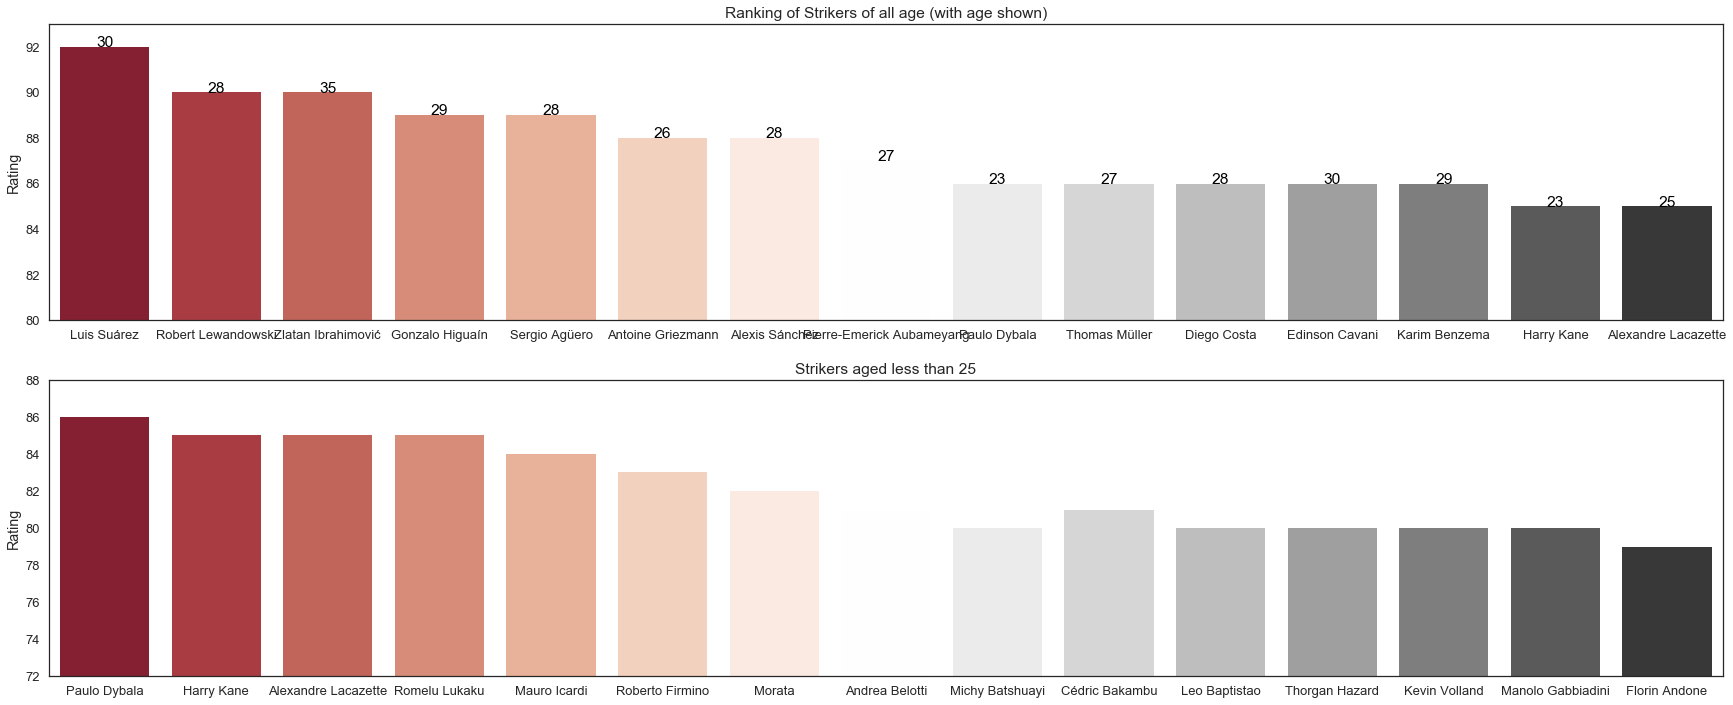

In [38]:
sns.set(style="white", context="talk")

# Setting up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 12), sharex=False)

# Generate some sequential data
ss = dfST[:15]
dreamTeam=ss
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['Rating']))
sns.barplot(x1, y1, palette="RdGy", ax=ax1)
ax1.set_title('Ranking of Strikers of all age (with age shown)')
ax1.set_ylabel("Rating")
ax1.set_ylim(80, 93)
for index, row in ss.iterrows():
    ax1.text(row.name,row.Rating,row.Age, color='black', ha="center")

ss2 = dfSTYoung[:15]
youngDreamTeam=ss
x2 = np.array(list(ss2['Name']))
y2 = np.array(list(ss2['Rating']))
sns.barplot(x2, y2, palette="RdGy", ax=ax2)
ax2.set_title('Strikers aged less than 25')
ax2.set_ylabel("Rating")
ax2.set_ylim(72, 88)
f.savefig("1 top15Striker.png")
f

#### Recomendation

From the plot above we can see ranking of all Strikers as well as Striker under the age of 25, Going for the best Striker considering the age factor as well we can choose:
-
Player Name (Nationality, Club) [Remarks]
1. Luis Suarez (Uruguay, Barcelona C.F.) [Excellent goal scorers, dependable, Age 30, but Players of his caliber are hard to find. Also, a good striker career generally last at least 35 years, and he can be a great pick]
2. Robert Lewandowski (Poland, bayern Munich) [Age 28, World class striker]
3. Antoine Griezmann (France, Athletico Madrid)  [Age 26, Young and great striker, with a great future ahead]
4. Paulo Dybala (Argentina, Juventus FC)  [Age 23, Exceptional talent roaring to shine]
5. Harry Kane (England, Totenham Hotspur)  [23 year old, Tall striker. Making good name for himselft over the alst 3 years, an exceptional draft]
6. Alexandre Lacazette (France, Arsenal)
7. Romelu Lukaku (Belgium, Manchester United)
8. Roberto Firmino (Brazil, Liverpool F.C.)

During a game, a team can have 3 strikers on the team sheet, 1 to 2 in playing 11 and rest in the substitutes. But to sustain a team for a whole season (one year) At a time a Generally a team could use 3-4 Strikers, counting for Injury periods, and to provide competition for the position and hence strong performance by the player. If permitted, the management should pick from the Strikers listed above.

### Center Attacking Midfielder
Now we will evaluate for top Ceneral Attacking Mid fielders.

In [39]:
print('Average age of all Center Attaking Midfielders in the data set is: ', dfCAM['Age'].mean(), 'Years.')

Average age of all Center Attaking Midfielders in the data set is:  24.908925318761383 Years.


Making a dataset of young CAM under the age of 25 to help us evaluate CAM in terms of their age and future career prospects (longevity)

In [40]:
dfCAMYoung=dfCAM[dfCAM['Age'] <=dfCAM['Age'].mean()+1]

In [41]:
print('Count of all CAM: ',dfCAM.Name.count())
print('Count of CAM under the age of 25:',dfCAMYoung.Name.count())

Count of all CAM:  1098
Count of CAM under the age of 25: 671


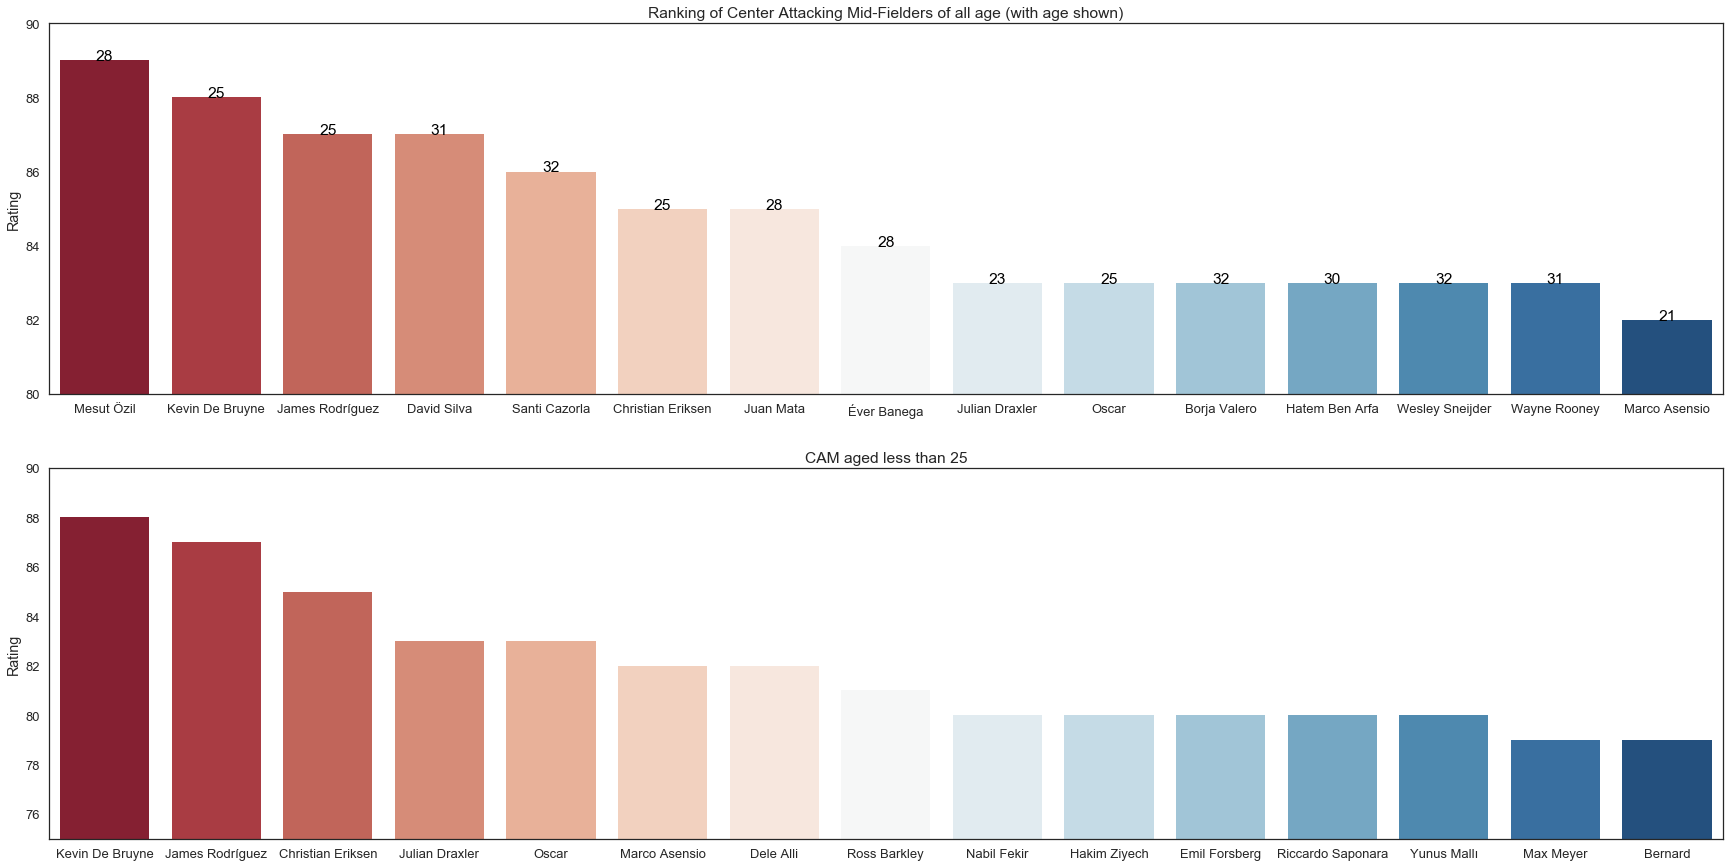

In [42]:
sns.set(style="white", context="talk")

# Setting up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 15), sharex=False)

# Generate some sequential data
ss = dfCAM[:15]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['Rating']))
sns.barplot(x1, y1, palette="RdBu", ax=ax1)
ax1.set_title('Ranking of Center Attacking Mid-Fielders of all age (with age shown)')
ax1.set_ylabel("Rating")
ax1.set_ylim(80, 90)
for index, row in ss.iterrows():
    ax1.text(row.name,row.Rating,row.Age, color='black', ha="center")

ss2 = dfCAMYoung[:15]
x2 = np.array(list(ss2['Name']))
y2 = np.array(list(ss2['Rating']))
sns.barplot(x2, y2, palette="RdBu", ax=ax2)
ax2.set_title('CAM aged less than 25')
ax2.set_ylabel("Rating")
ax2.set_ylim(75, 90)
f.savefig("2 top15CAM.png")
dreamTeam.append(ss)
youngDreamTeam.append(ss2)
f

From the plot above we can see ranking of all Center Attacking Midfielders as well as CAM under the age of 25, Going for the best CAMs considering the age factor as well we can choose:
-
Player Name (Nationality, Club) [Remark]
1. Mesut Ozil (Germany, Arsenal) [28 years old, play maker with exceptional vission and passing accuracy]
2. Kevin De Bruyne (Belgium, Manchester City) [25 years old]
3. James Rodriguez (Columbia, plays for Bayern Munich on loan from Real Madrid) [25 years old]
4. Christian Eriksen (Denamrk, Tottenham Hotspur)  [25 years old]
5. Julian Draxler (Germany,  Paris Saint-Germain F.C)  [23 years old]
6. Oscar (Brazil,  Shanghai SIPG F.C.)  [25 years old]
7. Marco Asensio (Spain,  Real Madrid C.F.)  [21 years old]
8. Dele Alli (England, Totenham Hotspur F.C.)
9. Ross Barkley (England, Manchester City F.C.)

During a game, a team has 2 to 3 CAM, one in playing 11 and others in the substitutes. We should definitely be picking 3 to 4 CAM from the ones listed above.

### Attacking Winger

Now we will evalaute for top Attacking wingers (Mid fielders).

### Left Attacking Winger

First we'll look into Left Attacking Winger and then Right Attacking Winger

In [43]:
print('Average age of all Left Attacking Midfielders (Left Wingers) in the data set is: ', dfLeftWinger['Age'].mean(), 'Years.')

Average age of all Left Attacking Midfielders (Left Wingers) in the data set is:  24.794851794071764 Years.


Making a dataset of young LW under the age of 25 to help us evaluate LW in terms of their age and future career prospects (longevity).

In [44]:
dfLeftWingerYoung=dfLeftWinger[dfLeftWinger['Age'] <=dfLeftWinger['Age'].mean()]

In [45]:
print('Count of all Left Winger: ',dfLeftWinger.Name.count())
print('Count of LM/LW under the age of 24: ',dfLeftWingerYoung.Name.count())

Count of all Left Winger:  1282
Count of LM/LW under the age of 24:  640


Plotting for Left Wingers/ Attacking Mid

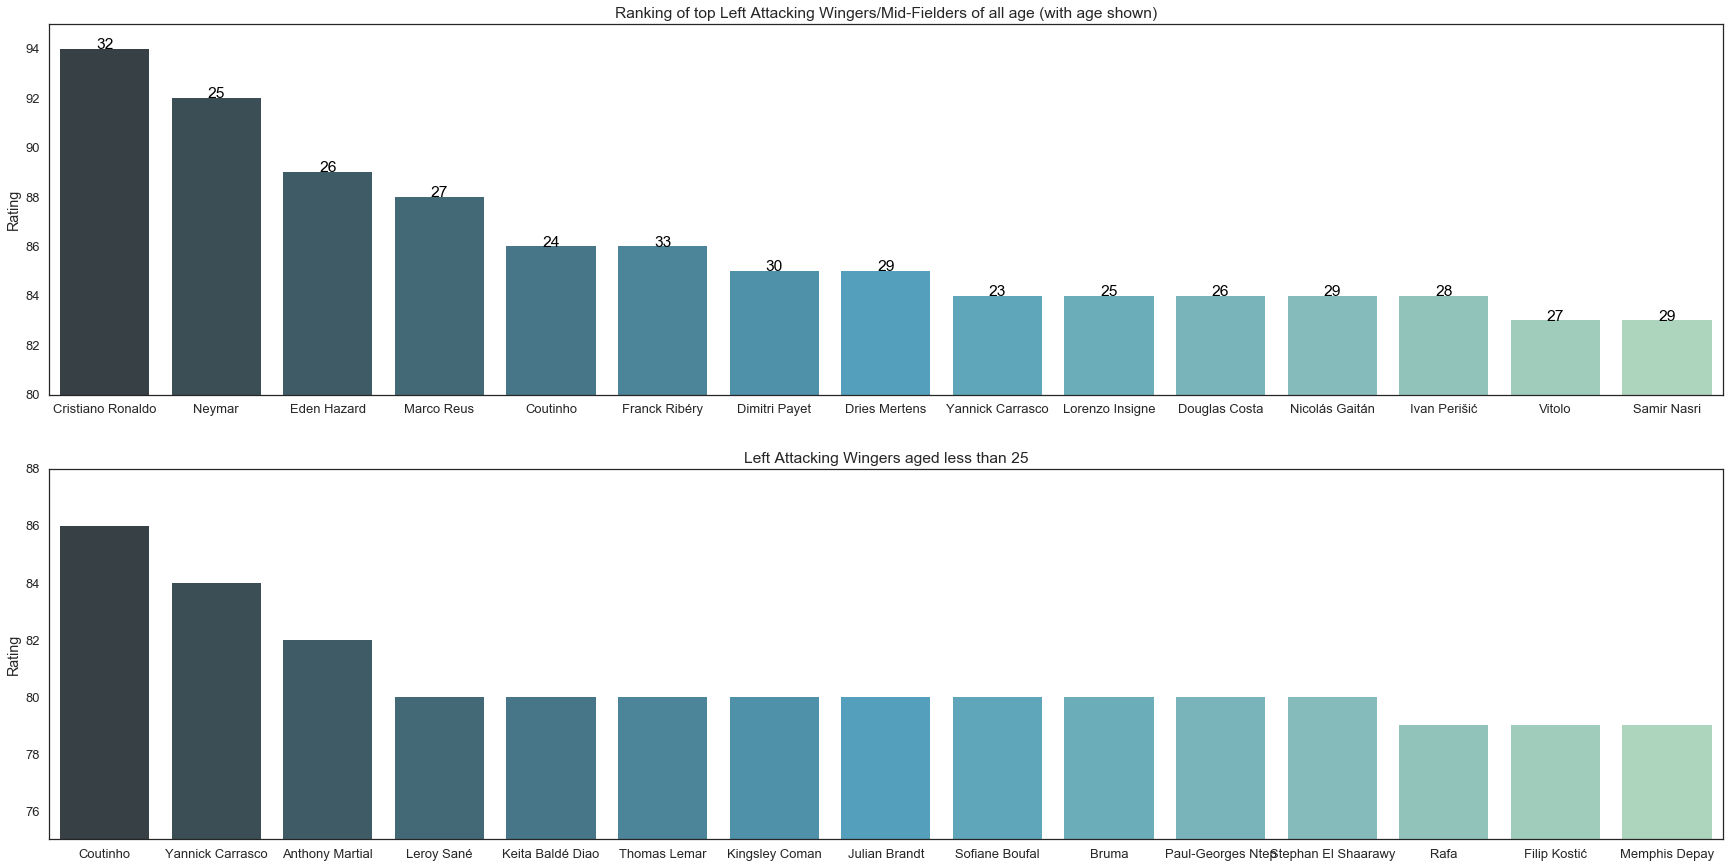

In [46]:
sns.set(style="white", context="talk")

# Setting up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 15), sharex=False)

# Generate some sequential data
ss = dfLeftWinger[:15]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['Rating']))
sns.barplot(x1, y1, palette="GnBu_d", ax=ax1)
ax1.set_title('Ranking of top Left Attacking Wingers/Mid-Fielders of all age (with age shown)')
ax1.set_ylabel("Rating")
ax1.set_ylim(80, 95)
for index, row in ss.iterrows():
    ax1.text(row.name,row.Rating,row.Age, color='black', ha="center")

ss2 = dfLeftWingerYoung[:15]
x2 = np.array(list(ss2['Name']))
y2 = np.array(list(ss2['Rating']))
sns.barplot(x2, y2, palette="GnBu_d", ax=ax2)
ax2.set_title('Left Attacking Wingers aged less than 25')
ax2.set_ylabel("Rating")
ax2.set_ylim(75, 88)
f.savefig("3 top15LW.png")
dreamTeam.append(ss)
youngDreamTeam.append(ss2)
f

From the plot above we can see ranking of Left Attacking Midfielders as well as LW/LM under the age of 25, Going for the best Left Wingers considering the age factor as well we can choose:
-
Player Name (Nationality, Club)
1. Cristiano Ronaldo (Portugal, Real Madrid C.F.) [32 years old, but his name on the team sheet can put the opponents under tremendous pressure, resulting in errors. 5 times Ballon d'Or winner, Formerly most expensive transfer at €94 million]
2. Neymar (Brazil, Paris Saint-Germain F.C.) [Young and Exceptional talent, Currently most expensive transfer at €222 million]
3. Eden Hazard (Belgium, Chelsea F.C.) [Young, athletic LW, touted to be next Cristiano Ronaldo]
4. Philippe Coutinho (Brazil, Barcelona) [Young and Exceptional talent, Recently transferred at a price of €160 million]
5. Marco Reus (Germany, Borussia Dortmund) [27 years old great Winger]
6. Yannick Carrasco (Belgium, Juventus F.C.)

We need to pick at least 2 LW, can go for any of the players mentioned above.

### Right Attacking Winger

In [47]:
print('Average age of all Attacking Right Midfielders (Right Wingers) in the data set is: ', dfRightWinger['Age'].mean(), 'Years.')

Average age of all Attacking Right Midfielders (Right Wingers) in the data set is:  24.632956152758133 Years.


Making a dataset of young RW under the age of 34 to help us evaluate RW in terms of their age and future career prospects (longevity).

In [48]:
dfRightWingerYoung=dfRightWinger[dfRightWinger['Age'] <=dfRightWinger['Age'].mean()]

In [49]:
print('Count of all Right Winger: ',dfRightWinger.Name.count())
print('Count of LM/LW under the age of 24:',dfRightWingerYoung.Name.count())

Count of all Right Winger:  1414
Count of LM/LW under the age of 24: 717


Plotting for Right Wingers/ Attacking Mid

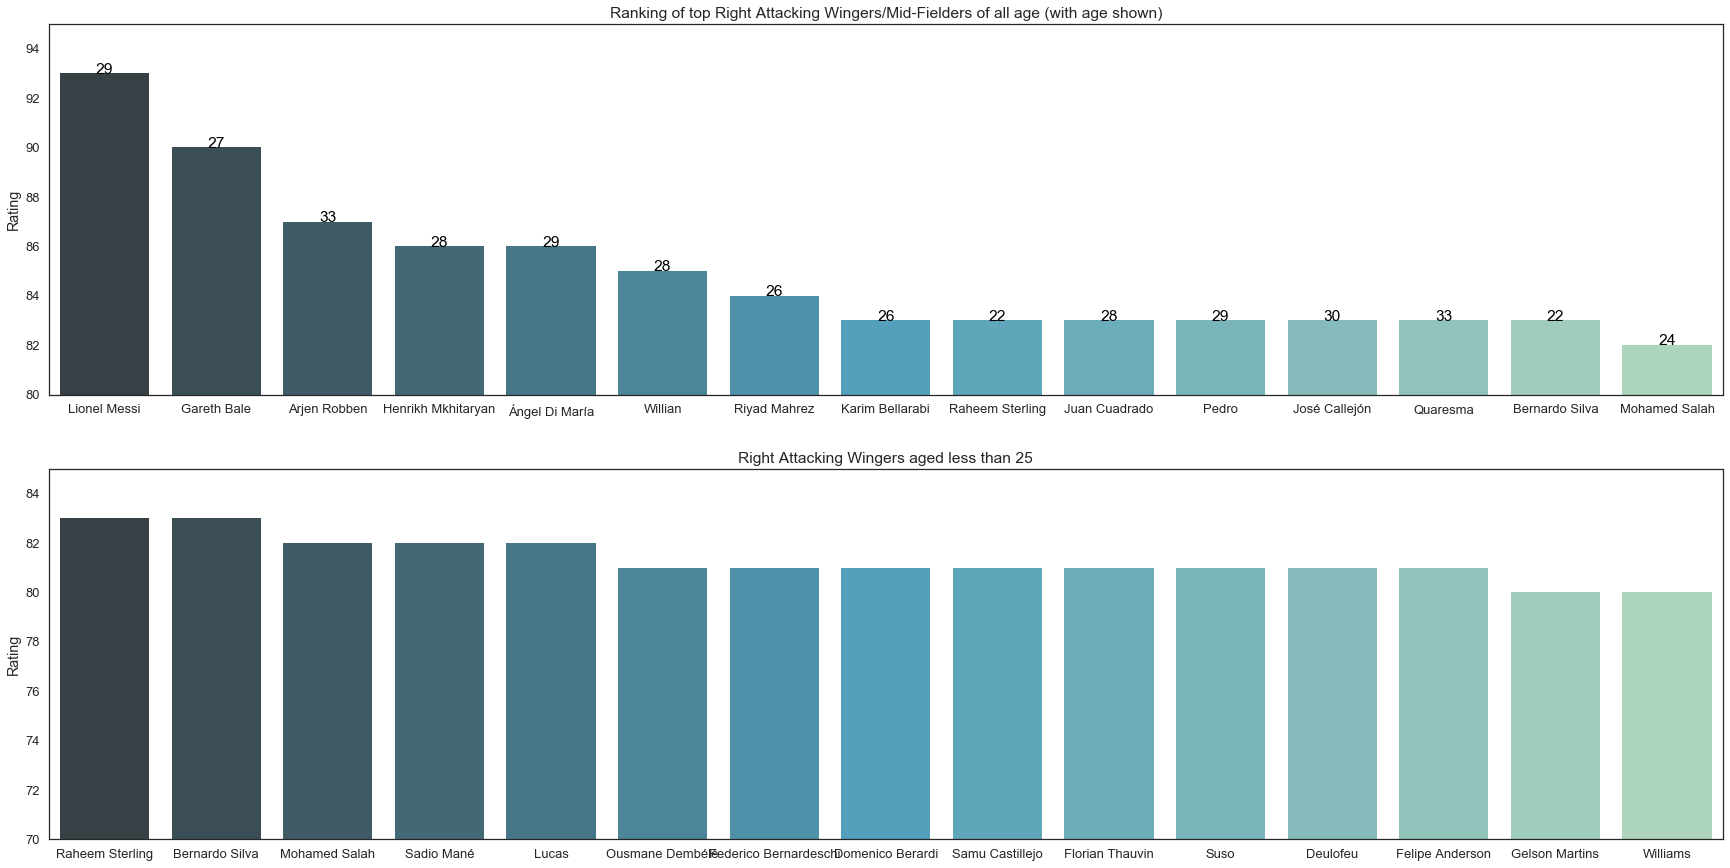

In [50]:
sns.set(style="white", context="talk")

# Setting up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 15), sharex=False)

# Generate some sequential data
ss = dfRightWinger[:15]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['Rating']))
sns.barplot(x1, y1, palette="GnBu_d", ax=ax1)
ax1.set_title('Ranking of top Right Attacking Wingers/Mid-Fielders of all age (with age shown)')
ax1.set_ylabel("Rating")
ax1.set_ylim(80, 95)
for index, row in ss.iterrows():
    ax1.text(row.name,row.Rating,row.Age, color='black', ha="center")

ss2 = dfRightWingerYoung[:15]
x2 = np.array(list(ss2['Name']))
y2 = np.array(list(ss2['Rating']))
sns.barplot(x2, y2, palette="GnBu_d", ax=ax2)
ax2.set_title('Right Attacking Wingers aged less than 25')
ax2.set_ylabel("Rating")
ax2.set_ylim(70, 85)

f.savefig("4 top15RW.png")
dreamTeam.append(ss)
youngDreamTeam.append(ss2)
f

From the plot above we can see ranking of Right Attacking Midfielders as well as RW/RM under the age of 25, Going for the best Right Wingers considering the age factor as well we can choose:
-
Player Name (Nationality, Club)
1. Lionel Messi (Argentina, Barcelona)  [5 times Ballon d'Or winner, Undoubtedly one of the best Football players ever. Current Pichichi Trophy (La Liga - Spanish League Golden boot winner)]
2. Gareth Bale (Wales, Real Madrid C.F.) [Formerly most expensive transfer €100 million]
3. Mohamed Salah (Egypt, Liverpool F.C.) [24 year old exceptional goal scorer, Current EPL (English Premiere League) Golden boot winner]
4. Raheem Sterling (England, Manchester City F.C.) [Young and Exceptional talent]
5. Henrikh Mkhitaryan (Armenia, Arsenal)


We need to pick at least 2 RW, can go for any of the players mentioned above.

### Defensive Midfielder (CDM/CM)


After completing the evaluation for Forwards and Attacking Midfielder, now we are left with working on our Defensive strength. We will start off evaluating Center Midfielders (Defensive Mid) that we have in our data set.

In [51]:
print('Average age of all Center Defensive Midfielders in the data set is: ', dfCM['Age'].mean(), 'Years.')

Average age of all Center Defensive Midfielders in the data set is:  25.40265742345465 Years.


Making a dataset of young CM/CDM under the age of 25 to help us evaluate CM/CDM in terms of their age and future career prospects (longevity).

In [52]:
dfCMYoung=dfCM[dfCM['Age'] <=dfCM['Age'].mean()]

In [53]:
print('Count of all CM: ',dfCM.Name.count())
print('Count of CM under the age of 25: ',dfCMYoung.Name.count())

Count of all CM:  3462
Count of CM under the age of 25:  1876


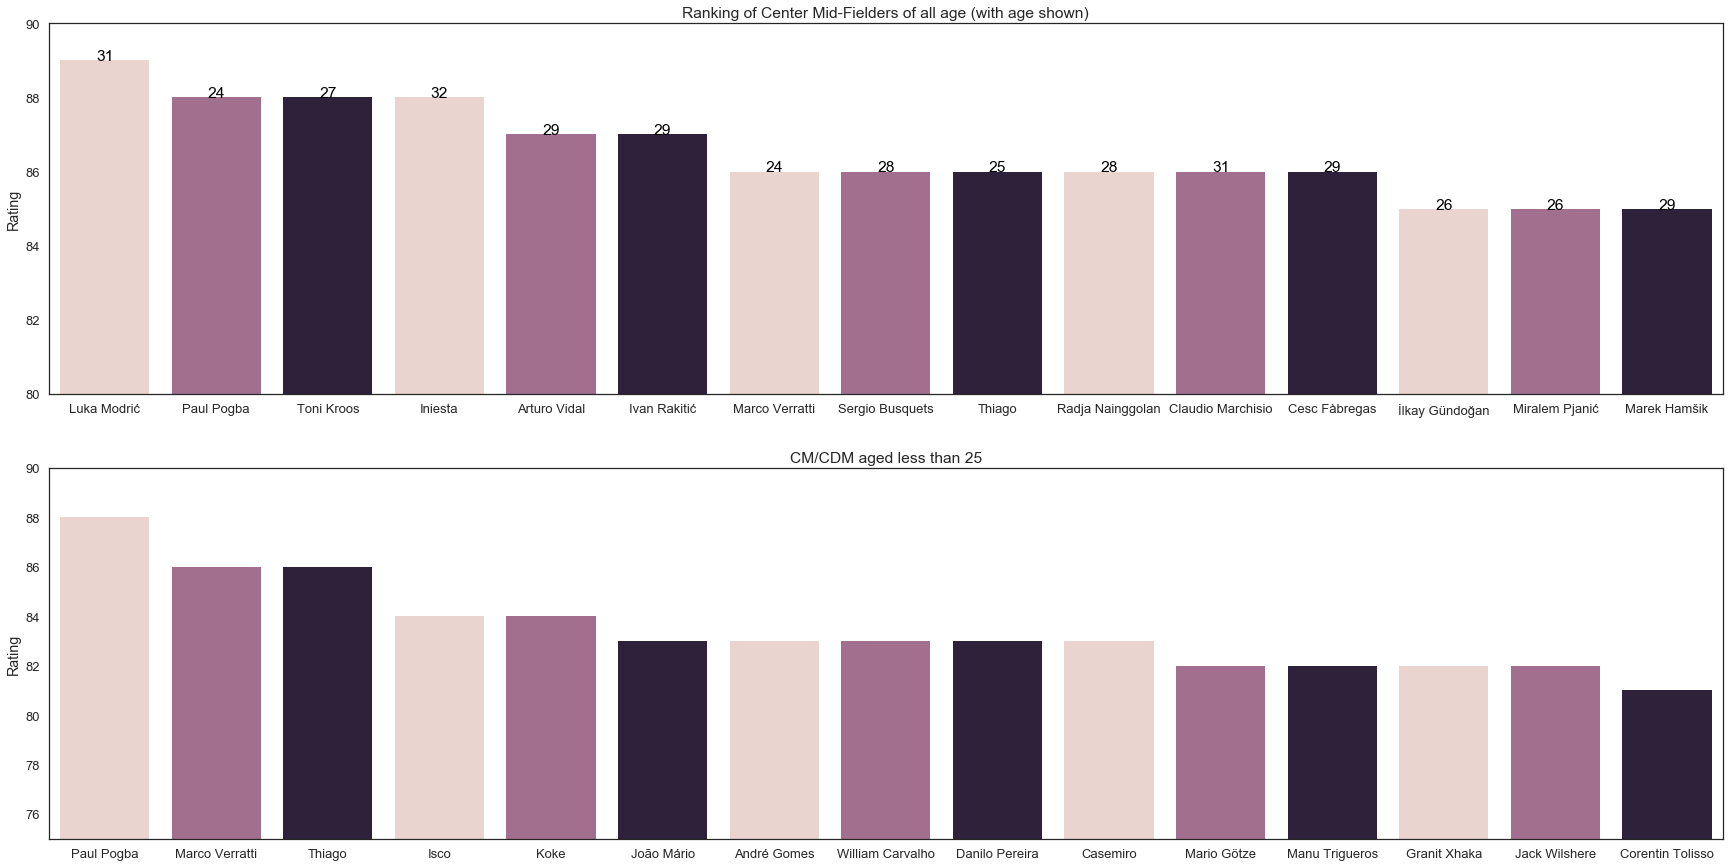

In [54]:
sns.set(style="white", context="talk")

# Setting up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 15), sharex=False)

# Generate some sequential data
ss = dfCM[:15]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['Rating']))
sns.barplot(x1, y1, palette=sns.cubehelix_palette(3), ax=ax1)
ax1.set_title('Ranking of Center Mid-Fielders of all age (with age shown)')
ax1.set_ylabel("Rating")
ax1.set_ylim(80, 90)
for index, row in ss.iterrows():
    ax1.text(row.name,row.Rating,row.Age, color='black', ha="center")

ss2 = dfCMYoung[:15]
x2 = np.array(list(ss2['Name']))
y2 = np.array(list(ss2['Rating']))
sns.barplot(x2, y2, palette=sns.cubehelix_palette(3), ax=ax2)
ax2.set_title('CM/CDM aged less than 25')
ax2.set_ylabel("Rating")
ax2.set_ylim(75, 90)
f.savefig("5 top15CM.png")
dreamTeam.append(ss)
youngDreamTeam.append(ss2)
f

From the plot above we can see ranking of Center Midfielders (CDM) as well as RW/RM under the age of 25, Going for the best Right Wingers considering the age factor as well we can choose:
-
Player Name (Nationality, Club)
1. Luka Modric (Croatia, Real Madrid C.F.)  [Exceptional Center Mid with, great vision, and accuracy. Asset to any Mid field]
2. Paul Pogba (France, Manchester United) [Formerly most expensive transfer €105 million]
3. Toni Kroos (Germany, Real Madrid C.F.) [27 year old exceptional holding midfielder]
4. Marco Verrati (France, PSG) [Young and Exceptional talent]
5. Sergio Busquets (Spain, Barcelona) [28 years old, experienced midfielder, could be the Back bone of any Midfield]
6. Thiago (Spain, Bayern Munich)
7. Isco (Spain, Real Madrid C.F.) [Young, Energetic, Exceptional play maker, great dribbler]
8. Koke (Spain, Atheltico Madrid C.F.) [Young, Great holding midfielder]
9. Casemiro (Brazil, Real Madrid C.F.) [Young, Energetic, Exceptional holding defencive midfielder]
10. Joao Mario (portugal, West Ham United F.C.)


We need to pick at least 5 to 7 CM/CDM, can go for any of the players mentioned above.

### Wing Backs (Left/Right Defender)

Now we will rank Wing backs for our team (Left, Right Back).


### Left Wing Back

First we'll look into Left Wing Back (Defender) and then Right Wing Back (Defender)

In [55]:
print('Average age of all Left Wing Backs Defenders in the data set is: ', dfLeftWingBackDef['Age'].mean(), 'Years.')


Average age of all Left Wing Backs Defenders in the data set is:  25.341672623302358 Years.


Making a dataset of young LB under the age of 25 to help us evaluate LB in terms of their age and future career prospects (longevity).

In [56]:
dfLBYoung=dfLeftWingBackDef[dfLeftWingBackDef['Age'] <=dfLeftWingBackDef['Age'].mean()]

In [57]:
print('Count of all LB: ',dfLeftWingBackDef.Name.count())
print('Count of LB under the age of 25: ',dfLBYoung.Name.count())

Count of all LB:  1399
Count of LB under the age of 25:  761


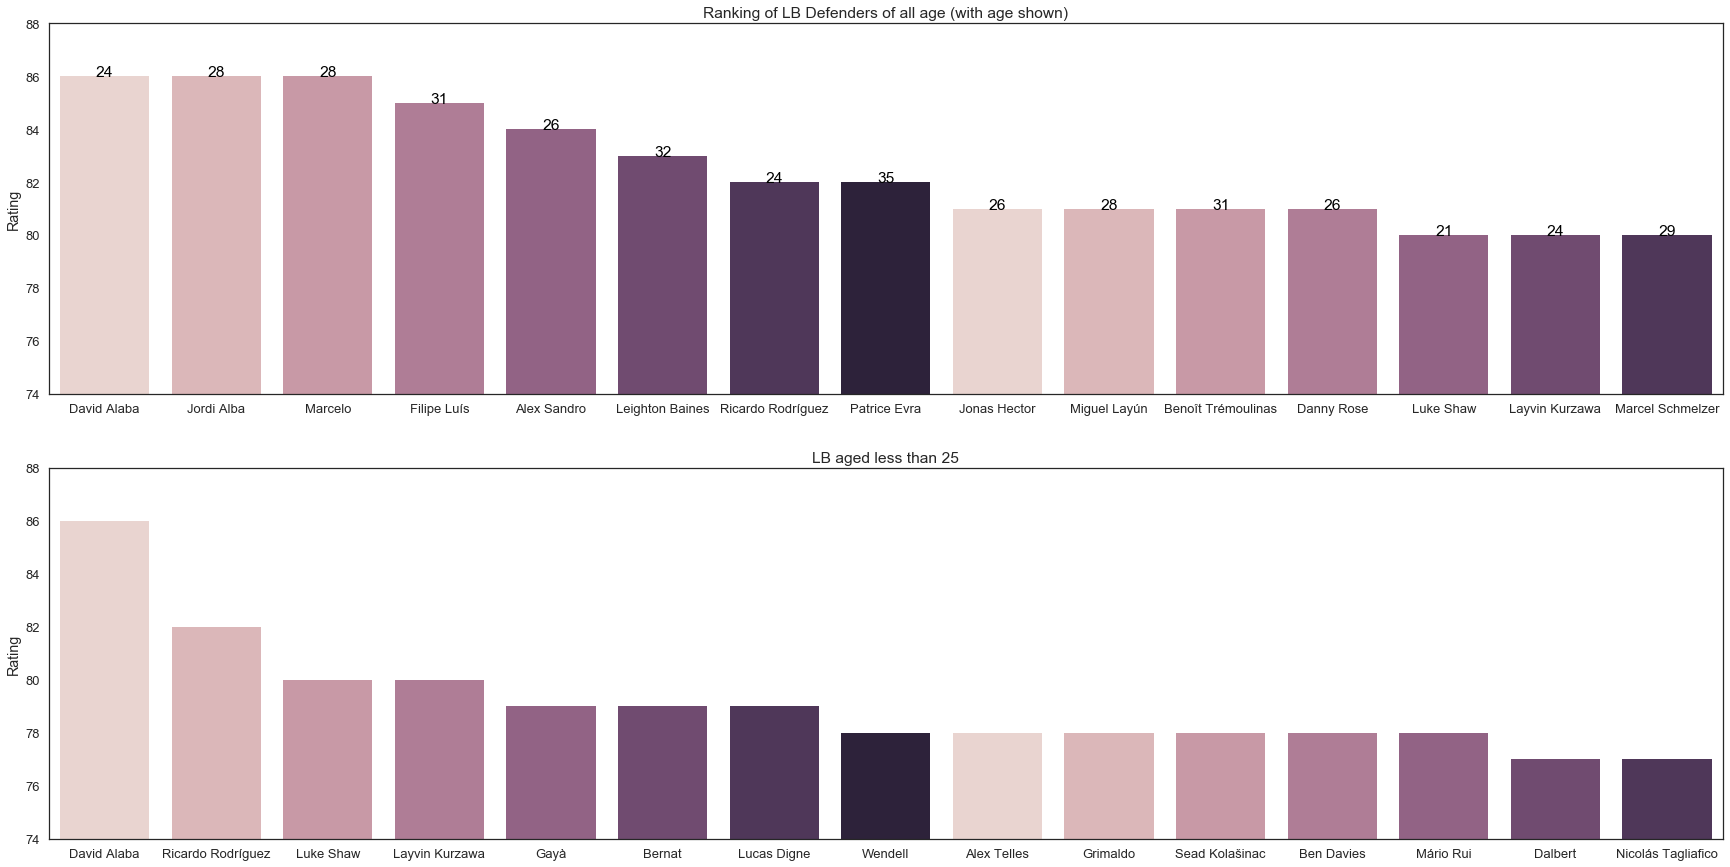

In [58]:
sns.set(style="white", context="talk")

# Setting up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 15), sharex=False)

# Generate some sequential data
ss = dfLeftWingBackDef[:15]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['Rating']))
sns.barplot(x1, y1, palette=sns.cubehelix_palette(8), ax=ax1)
ax1.set_title('Ranking of LB Defenders of all age (with age shown)')
ax1.set_ylabel("Rating")
ax1.set_ylim(74, 88)
for index, row in ss.iterrows():
    ax1.text(row.name,row.Rating,row.Age, color='black', ha="center")

ss2 = dfLBYoung[:15]
x2 = np.array(list(ss2['Name']))
y2 = np.array(list(ss2['Rating']))
sns.barplot(x2, y2, palette=sns.cubehelix_palette(8), ax=ax2)
ax2.set_title('LB aged less than 25')
ax2.set_ylabel("Rating")
ax2.set_ylim(74, 88)
f.savefig("6 top15LWB.png")
dreamTeam.append(ss)
youngDreamTeam.append(ss2)
f

From the plot above we can see ranking of all Left Back as well as LB under the age of 25, We see that LB geenrally attain a higher rating with more age and experience. Going for the best Left Defenders considering their age as well we can choose,

- Player Name (Nationality)
1. David Alaba (Germany)
2. Jordi Alba (Spain)
3. Marcelo (Brazil)
4. Filipe Luis (Spain)
5. Alex Sandro (Brazil)
6. Ricardo Rodriguez (Switzerland)
7. Luke Shaw (England)

We need to pick at least 3 to 4 LB we can go for any of the players mentioned above.

### Right Wing Back


In [59]:
print('Average age of all Right Center Backs in the data set is: ', dfRightWingBackDef['Age'].mean(), 'Years.')

Average age of all Right Center Backs in the data set is:  25.50990099009901 Years.


Making a dataset of young RB under the age of 25 to help us evaluate RB in terms of their age and future career prospects (longevity).

In [60]:
dfRBYoung=dfRightWingBackDef[dfRightWingBackDef['Age'] <=dfRightWingBackDef['Age'].mean()]
print('Count of all RB: ',dfRightWingBackDef.Name.count())
print('Count of RB under the age of 24: ',dfRBYoung.Name.count())

Count of all RB:  1414
Count of RB under the age of 24:  743


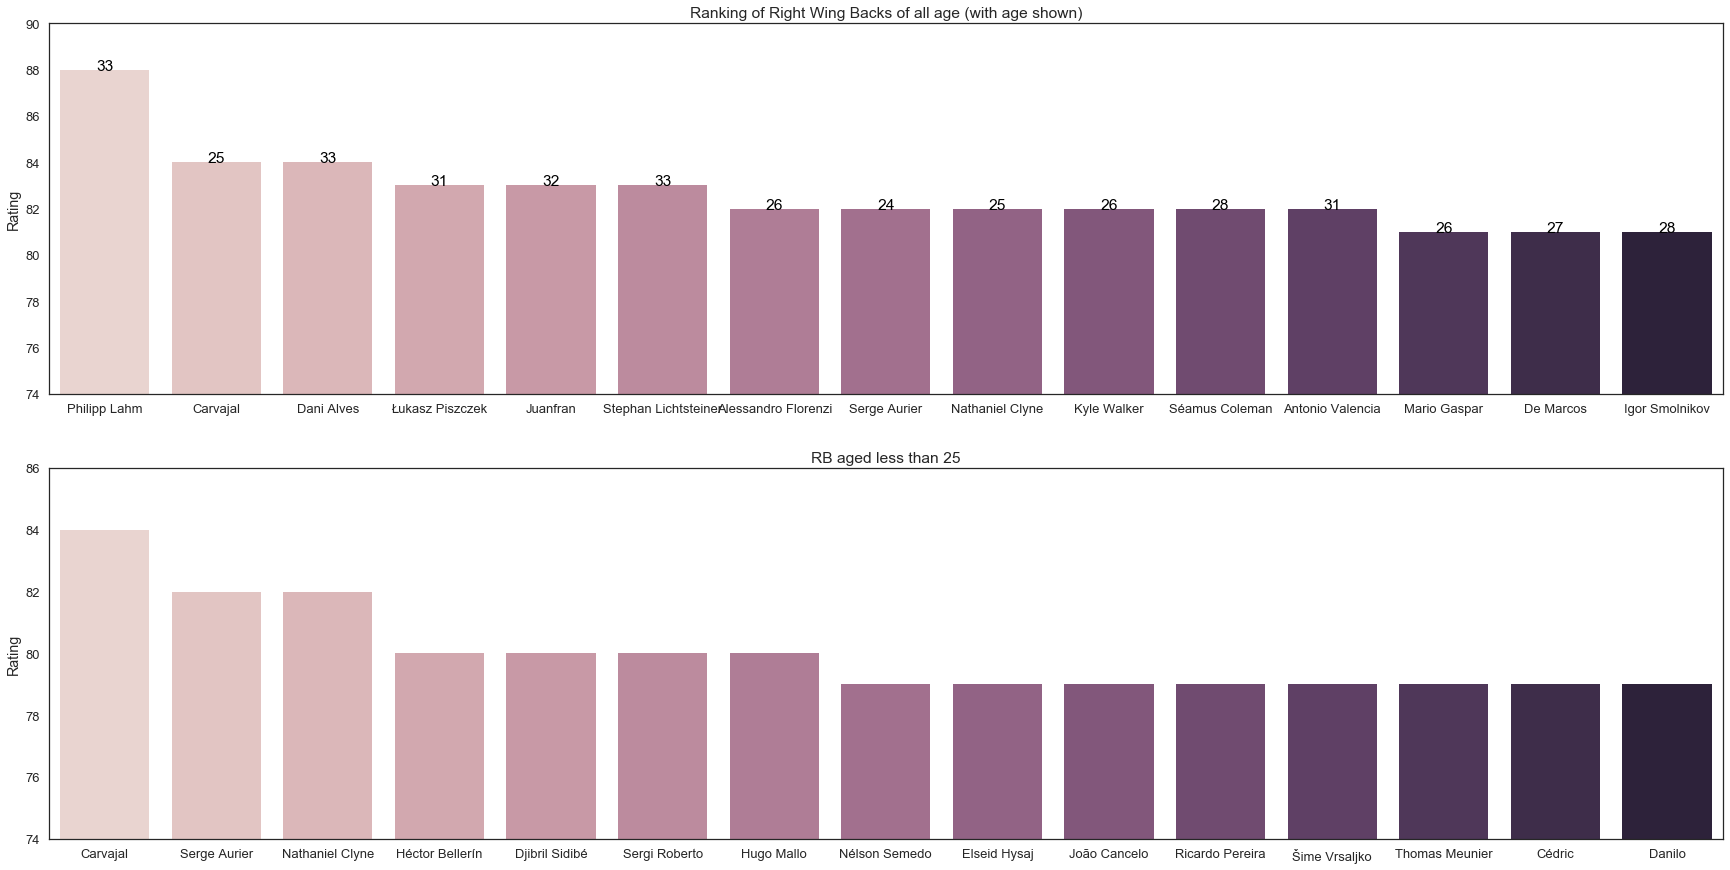

In [61]:
sns.set(style="white", context="talk")

# Setting up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 15), sharex=False)

# Generate some sequential data
ss = dfRightWingBackDef[:15]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['Rating']))
sns.barplot(x1, y1, palette=sns.cubehelix_palette(15), ax=ax1)
ax1.set_title('Ranking of Right Wing Backs of all age (with age shown)')
ax1.set_ylabel("Rating")
ax1.set_ylim(74, 90)
for index, row in ss.iterrows():
    ax1.text(row.name,row.Rating,row.Age, color='black', ha="center")

ss2 = dfRBYoung[:15]
x2 = np.array(list(ss2['Name']))
y2 = np.array(list(ss2['Rating']))
sns.barplot(x2, y2, palette=sns.cubehelix_palette(15), ax=ax2)
ax2.set_title('RB aged less than 25')
ax2.set_ylabel("Rating")
ax2.set_ylim(74, 86)
f.savefig("7 top15RWB.png")
dreamTeam.append(ss)
youngDreamTeam.append(ss2)
f

From the plot above we can see ranking of all Right Wing Back as well as RB under the age of 25, Going for the best Right Defenders considering their age as well we can choose:
- Player Name (Nationality)
1. Carvajal (Spain)
2. Likasz Pisczek (Poland)
3. Allessandro Florenzi (Spain)
3. Serge Aurier (Ivory Coast)
4. Nathaniel Clyne (England)
5. Kyle Walker (England)
6. Hector Bellerin (Spain) (young talent)
7. Djibril Sidibe (France) (Young talent)

We need to pick at least 3 to 4 RB we can go for any of the players mentioned above.

### Central Defenders (CB)

In [62]:
print('Average age of all Center Backs in the data set is: ', dfCB['Age'].mean(), 'Years.')

Average age of all Center Backs in the data set is:  25.947547683923705 Years.


Making a dataset of young CB under the age of 25 to help us evaluate CB in terms of their age and future career prospects (longevity).

In [63]:
dfCBYoung=dfCB[dfCB['Age'] <=dfCB['Age'].mean()]

In [64]:
print('Count of all CB: ',dfCB.Name.count())
print('Count of CB under the age of 25:',dfCBYoung.Name.count())

Count of all CB:  2936
Count of CB under the age of 25: 1447


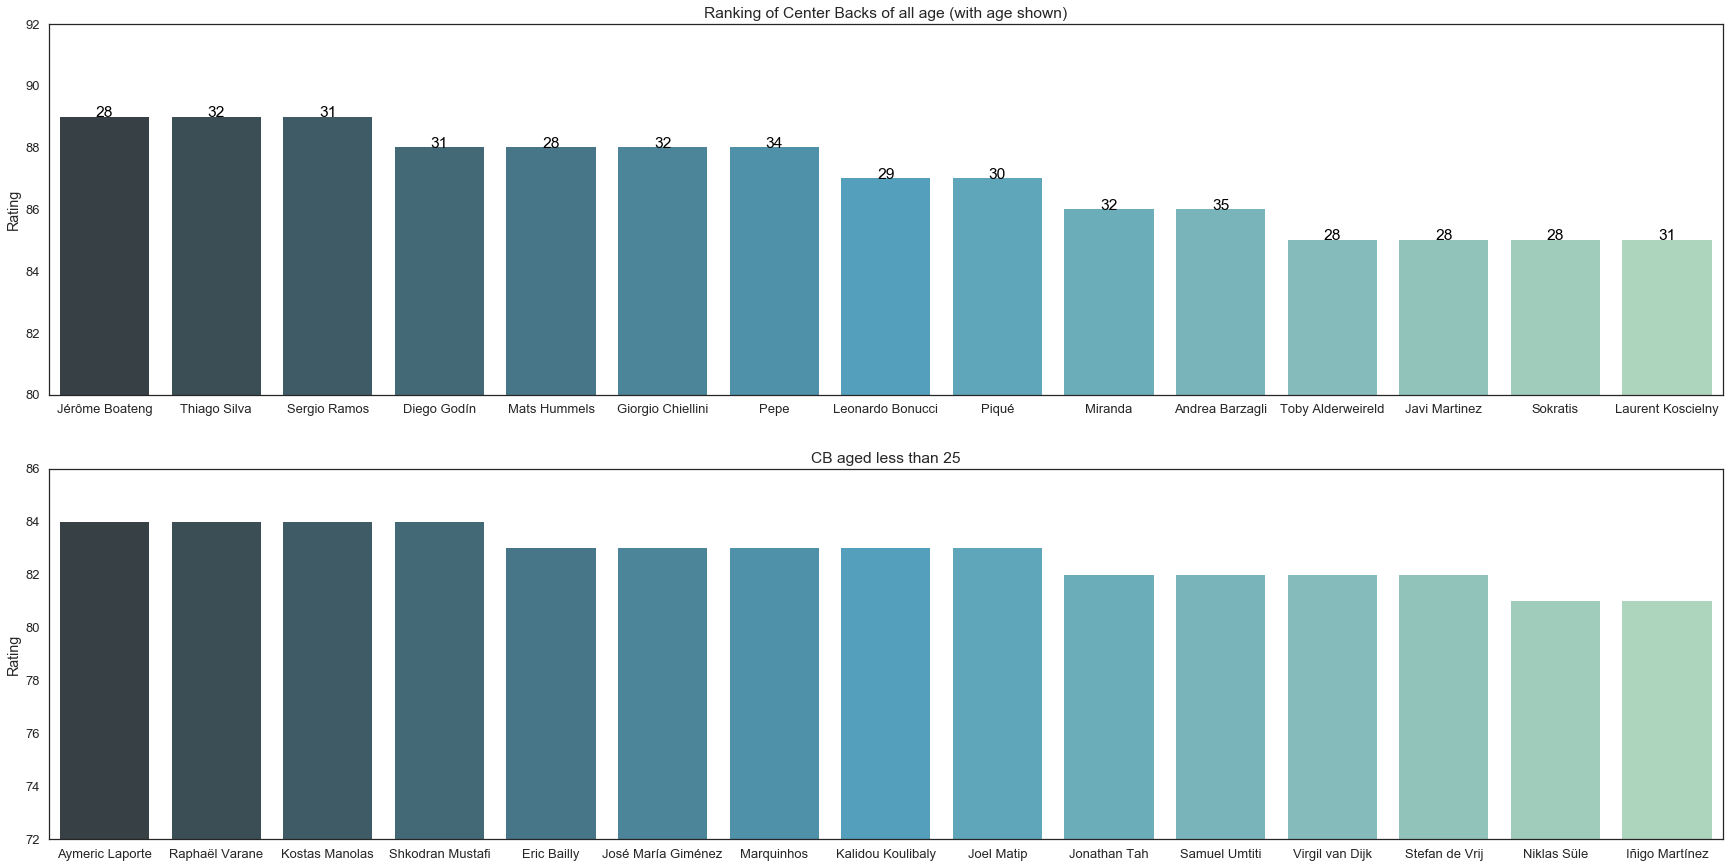

In [65]:
sns.set(style="white", context="talk")

# Setting up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 15), sharex=False)

# Generate some sequential data
ss = dfCB[:15]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['Rating']))
sns.barplot(x1, y1, palette="GnBu_d", ax=ax1)
ax1.set_title('Ranking of Center Backs of all age (with age shown)')
ax1.set_ylabel("Rating")
ax1.set_ylim(80, 92)
for index, row in ss.iterrows():
    ax1.text(row.name,row.Rating,row.Age, color='black', ha="center")

ss2 = dfCBYoung[:15]
x2 = np.array(list(ss2['Name']))
y2 = np.array(list(ss2['Rating']))
sns.barplot(x2, y2, palette="GnBu_d", ax=ax2)
ax2.set_title('CB aged less than 25')
ax2.set_ylabel("Rating")
ax2.set_ylim(72, 86)
f.savefig("8 top15CB.png")
dreamTeam.append(ss)
youngDreamTeam.append(ss2)
f

From the plot above we can see ranking of all Center Back as well as CB under the age of 25, Going for the best Center Defenders considering their age as well we can choose:
-
Player Name (Nationality)
1. Jerome Boateng (Germany)
2. Thiago Silva (Brazil)
3. Sergio Ramos (Spain)
4. Mats Hummels (Germany)
5. Leonardo Bonucci (Italy)
6. Pique (Spain)
7. Diego Godin (Uruguay)
8. Javi Martinez (Germany)
9. Toby Alderweireld (Belgium)

We need to pick at least 5 to 6 RB we can go for any of the players mentioned above.

### Goal Keepers

Finally we need to shortlist Goal Keepers for our team.

In [66]:
print('Average age of all GKs in the data set is:', dfGK['Age'].mean(), 'Years.')


Average age of all GKs in the data set is: 26.480279580629055 Years.


Making a dataset of young GK under the age of 25 to help us evaluate Gk in terms of their age and future career prospects (longevity).

In [67]:
dfGKYoung=dfGK[dfGK['Age'] <=dfGK['Age'].mean()]

In [68]:
print('Count of all GK: ',dfGK.Name.count())
print('Count of GK under the age of 26:',dfGKYoung.Name.count())

Count of all GK:  2003
Count of GK under the age of 26: 1087


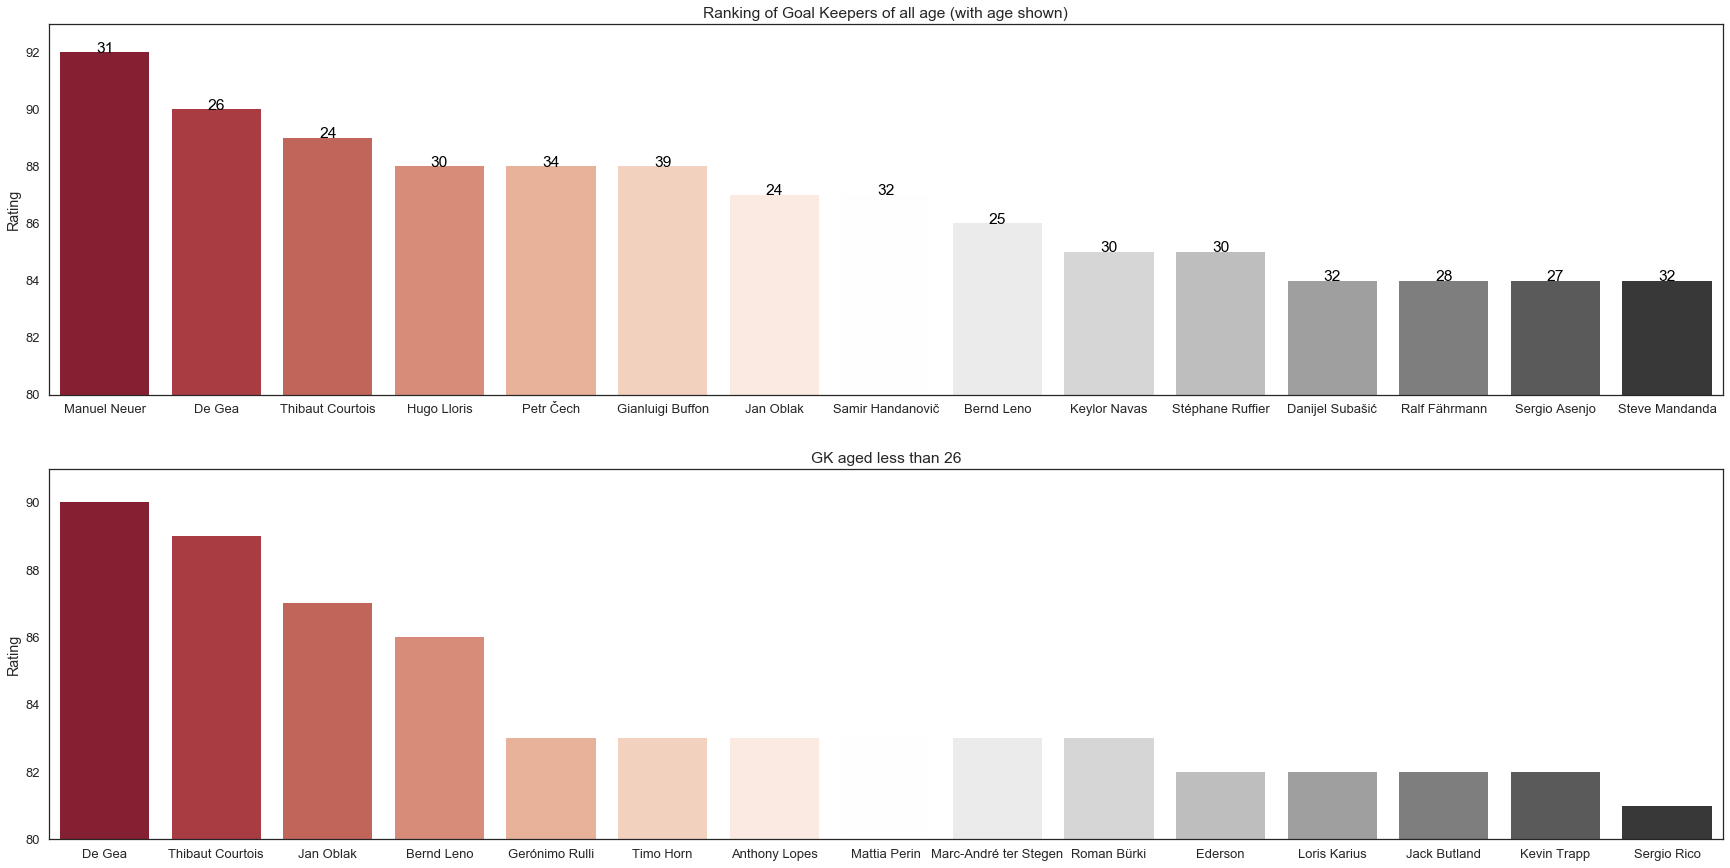

In [69]:
sns.set(style="white", context="talk")

# Setting up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 15), sharex=False)

# Generate some sequential data
ss = dfGK[:15]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['Rating']))
sns.barplot(x1, y1, palette="RdGy", ax=ax1)
ax1.set_title('Ranking of Goal Keepers of all age (with age shown)')
ax1.set_ylabel("Rating")
ax1.set_ylim(80, 93)
for index, row in ss.iterrows():
    ax1.text(row.name,row.Rating,row.Age, color='black', ha="center")

ss2 = dfGKYoung[:15]
x2 = np.array(list(ss2['Name']))
y2 = np.array(list(ss2['Rating']))
sns.barplot(x2, y2, palette="RdGy", ax=ax2)
ax2.set_title('GK aged less than 26')
ax2.set_ylabel("Rating")
ax2.set_ylim(80, 91)
f.savefig("9 top15GK.png")
dreamTeam.append(ss)
youngDreamTeam.append(ss2)
f


From the plot above we can see ranking of all goal keepers as well as GK under the age of 26, Going for the best GK considering the age factor as well we can choose:
-
GK Name (Nationality, Club) [Remarks]
1. Manuel Neuer (Germany, Bayern Munich) [Excellent GK, Age 31, but still a good bet, given generally a GK career last till a longer age ~38+ years]
2. David De Gea (Spain, Manchester United) [Age 26, Great GK, great future potential]
3. Thibaut Courtois (Belgium, Chelsea)  [Age 24, Great GK, great future potential]
4. Hugo Loris (France, Tottenham Hotspurs)  [Age 30, V. Good GK]
5. Jan Oblak (Slovenia, Athletico Madrid)  [Age 24, Good GK, Young, great future potential]

During a game, a team has 2 GK, one in playing 11 and one in the substitutes. But to sustain a team for a whole season (one year) At a time a Generally a team could use 3-4 GK, counting for Injury periods, and to provide competition for the position and hence strong performance by the player. If permitted, the management should bet for Manuel Neuer, David De Gea, and Thibaut Courtois (or any 3 of the top 5 GKs ranked above).

Saving the teams in .csv format for future review, saving the top 15 players from each position as well as top 15 young players for each position.

In [70]:
dreamTeam.to_csv('BestTeam.csv', sep='\t', encoding='utf-8')
youngDreamTeam.to_csv('youngTeam.csv', sep='\t', encoding='utf-8')

## Recommendation 

After the analysis we can recommend the following players for the expansion draft

Striker: We need to pick at least 4 Strikers we can go for any of the players mentioned below.
1. Luis Suarez (Uruguay
2. Robert Lewandowski (Poland)
3. Antoine Griezmann (France)
4. Paulo Dybala (Argentina)
5. Harry Kane (England)
6. Alexandre Lacazette (France)
7. Romelu Lukaku (Belgium)
8. Roberto Firmino (Brazil)

CAM: We need to pick at least 3 to 4 CAM we can go for any of the players mentioned below.
1. Mesut Ozil (Germany)
2. Kevin De Bruyne (Belgium)
3. James Rodriguez (Columbia)
4. Christian Eriksen (Denamrk)
5. Julian Draxler (Germany)
6. Oscar (Brazil)
7. Marco Asensio (Spain)
8. Dele Alli (England)
9. Ross Barkley (England)

Attacking Winger (LW/RW):

LW: We need to pick at least 2 to 3 LW we can go for any of the players mentioned below.
1. Cristiano Ronaldo (Portugal)
2. Neymar (Brazil)
3. Eden Hazard (Belgium)
4. Philippe Coutinho (Brazil)
5. Marco Reus (Germany)
6. Yannick Carrasco (Belgium)

RW: We need to pick at least 2 to 3 RW we can go for any of the players mentioned below.
1. Lionel Messi (Argentina)
2. Gareth Bale (Wales)
3. Mohamed Salah (Egypt)
4. Raheem Sterling (England)
5. Henrikh Mkhitaryan (Armenia)

Defensive Midfielder (CDM/CM): We need to pick at least 5 to 7 CM we can go for any of the players mentioned below.
1. Luka Modric (Croatia)
2. Paul Pogba (France)
3. Toni Kroos (Germany)
4. Marco Verrati (France)
5. Sergio Busquets (Spain)
6. Thiago (Spain)
7. Isco (Spain)
8. Koke (Spain)
9. Casemiro (Brazil)
10. Joao Mario  (portugal)

Wing Backs (Left/Right Defender): 

LWB: We need to pick at least 2 to 4 LB we can go for any of the players mentioned below.
1. David Alaba (Germany)
2. Jordi Alba (Spain)
3. Marcelo (Brazil)
4. Filipe Luis (Spain)
5. Alex Sandro (Brazil)
6. Ricardo Rodriguez (Switzerland)
7. Luke Shaw (England)


RWB: We need to pick at least 2 to 4 RB we can go for any of the players mentioned below.
1. Carvajal (Spain)
2. Lukasz Pisczek (Poland)
3. Allessandro Florenzi (Spain)
3. Serge Aurier (Ivory Coast)
4. Nathaniel Clyne (Engalnd)
5. Kyle Walker (England)
6. Hector Bellerin (Spain) (young talent)
7. Djibril Sidibe (France) (Young talent)

Centre Back Defenders (CB Defender): We need to pick at least 5 to 6 RB we can go for any of the players mentioned below.
1. Jerome Boateng (Germany)
2. Thiago Silva (Brazil)
3. Sergio Ramos (Spain)
4. Mats Hummels (Germany)
5. Leonardo Bonucci (Italy)
6. Pique (Spain)
7. Diego Godin (Uruguay)
8. Javi Martinez (Germany)
9. Toby Alderweireld (Belgium)


GK: We need to pick at least 3 GK we can go for any of the players mentioned below.
1. Manuel Neuer (Germany)
2. David De Gea (Spain)
3. Thibaut Courtois (Belgium)
4. Hugo Loris (France)
5. Jan Oblak (Slovenia)

# Avoiding Draft Bust


At the moment we jsut have dataset of players containing their current skills and rating, if we have a dataset which shows players and say their last 5 years data, skills as well as performance in games. We can then using Machine learning find patterns among player performances and predict their future performance and based on this predicted results we can decide up on players and avoid Draft Bust.

# Bonus 

We can also use Machine Learning approach to help us find few other players, idea is to pic top players in each psoition.
Like Cristiano Ronaldo, Lionel Messi, Luis suarez, Manuel Neuer etc. we can then use Sci-Kit learn library to find other players in the dataset who are similar to a particular player. 

Say, we are filling in for a Left Winger, and we pick Cristiano Ronaldo as a benchamrk, we can then use ML to find us a set of player with attributes and skills similar to Cristiano Ronaldo and we can then pick from these set of players.

In [71]:
bestRated_players = playerDF[playerDF.loc[:,'Rating']>89]
bestRated_players

,Name,Club_Position,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,...,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,First_Preffered_Position
0,Cristiano Ronaldo,LW,94,185 cm,80 kg,Right,02/05/1985,32,LW/ST,High / Low,...,81,76,85,88,14,7,15,11,11,LW
1,Lionel Messi,RW,93,170 cm,72 kg,Left,06/24/1987,29,RW,Medium / Medium,...,89,90,74,85,14,6,15,11,8,RW
2,Neymar,LW,92,174 cm,68 kg,Right,02/05/1992,25,LW,High / Medium,...,79,84,81,83,15,9,15,9,11,LW
3,Luis Suárez,ST,92,182 cm,85 kg,Right,01/24/1987,30,ST,High / Medium,...,86,84,85,88,33,27,31,25,37,ST
4,Manuel Neuer,GK,92,193 cm,92 kg,Right,03/27/1986,31,GK,Medium / Medium,...,14,11,47,11,91,89,95,90,89,GK
5,De Gea,GK,90,193 cm,82 kg,Right,11/07/1990,26,GK,Medium / Medium,...,21,19,40,13,86,88,87,85,90,GK
6,Robert Lewandowski,ST,90,185 cm,79 kg,Right,08/21/1988,28,ST,High / Medium,...,77,76,81,86,8,15,12,6,10,ST
7,Gareth Bale,RW,90,183 cm,74 kg,Left,07/16/1989,27,RW,High / Medium,...,86,85,76,76,5,15,11,15,6,RW
8,Zlatan Ibrahimović,ST,90,195 cm,95 kg,Right,10/03/1981,35,ST,Medium / Low,...,82,82,91,93,9,13,10,15,12,ST
